In [1]:
import os
from pathlib import Path
import math

#Add in the path to the directory that contains the backmapped atomistic files
directory = os.fsencode("../A2A_TM5TM5_martini_EN_atomistic_files")
data_folder = Path("../A2A_TM5TM5_martini_EN_atomistic_files")

distances={} # Dictionary of distances on their own for each residues pair and each file
distance_cutoff={} # Dictionary of distance pairs with residue names <10 A for each file

# Helix A refers to the first transmembrane helix listed in the gro file
# Helix B refers to the second transmember helix listed in the gro file

# Create a for loop to go through all the files in the directory and open the files you are interested in

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    file_to_open = data_folder / filename
    #print(filename) # Ensure that all files are being read.
    
    # If the file contains the helix pair you are interested in, then open it.
    
    if filename.startswith("TM5TM5"):
        file_to_open = data_folder / filename
        f = open(file_to_open)
        all_lines_variable=f.readlines()
        f.close()
        
        TM_helix_A_residues=[] # Lists the residue number and 3 letter amino acid code for helix A
        TM_helix_A_residue_lines=[] # Lists the line of each residue in the gro file for helix A
        
        # We are interested in backbone-backbone distance between the helix pairs, 
        # so you only want to append the lines that contain 'CA' as these lines contain 
        # the coordinates to calculate the distances.
        
        # YOU NEED TO EDIT THE LINES THAT THE FILE READS FOR EACH HELIX COMBINATION
        
        for line in all_lines_variable[3:426]:
            if 'CA' in line:
                TM_helix_A_residues.append(line[2:8])
                TM_helix_A_residue_lines.append(line)
            
            TM_helix_B_residues=[] # Lists the residue number and 3 letter amino acid code for helix B
            TM_helix_B_residue_lines=[] # Lists the line of each residue in the gro file for helix B
            
            for line in all_lines_variable[427:850]:
                if 'CA' in line:
                    TM_helix_B_residues.append(line[2:8])
                    TM_helix_B_residue_lines.append(line)
        
        # Append the distances of each coordinate to variables for both helices
        
        # Assign the coordinate valuues to variables 
        
        for TM_helix_A_residue_line in TM_helix_A_residue_lines:
            
            x1=float(TM_helix_A_residue_line[22:28])
            y1=float(TM_helix_A_residue_line[30:36])
            z1=float(TM_helix_A_residue_line[38:44])
            
            for TM_helix_B_residue_line in TM_helix_B_residue_lines:
                
                x2=float(TM_helix_B_residue_line[22:28])
                y2=float(TM_helix_B_residue_line[30:36])
                z2=float(TM_helix_B_residue_line[38:44])
                
                # Calculate the distances between all helix residue pairs
            
                if TM_helix_A_residue_line != TM_helix_B_residue_line:
                    
                    d = math.sqrt(math.pow(x2-x1,2) +
                    math.pow(y2-y1, 2) +
                    math.pow(z2-z1, 2)* 1.0)
                    
                    dist_angstroms=d*10
                    
                    # Variable line prints the residue pair and distance between them.
                    res_dist=[TM_helix_A_residue_line[2:8],TM_helix_B_residue_line[2:8],dist_angstroms]
        
                    # If the file name already exists in the dictionary then append the residue distance between
                    # pair of helix residues. If not create a new dictionary entry.
                          
                    if filename in distances.keys():
                        distances[filename].append(res_dist)
                    else:
                        distances[filename] = [res_dist]
                    
                    # If the distance between the residues is less than the cutoff of 10A then append to
                    # the dictionary that stores residue pairs with distances less than the cutoff.
                    
                    if dist_angstroms < 10:
                        if filename in distance_cutoff.keys():
                            distance_cutoff[filename].append(res_dist)
                        else:
                            distance_cutoff[filename] = [res_dist]
                        
#print(distances)
#print(len(distances))
#print(distance_cutoff)
print("There are", len(distance_cutoff), "dimerised replicas")
#print(len(TM_helix_A_residues))
#print(len(TM_helix_B_residues))

There are 7 dimerised replicas


In [2]:
import pandas as pd

# Creates a dataframe of all atomistic files and the residue pair distances 

dict_distances = pd.DataFrame({ key:pd.Series(value) for key, value in distances.items() })
dict_distances

#Save as an excel spreadsheet for analysis - lists all files and the associated residue pairs and distances
#dict_distances.to_excel("dict_distances.xlsx") 

TM5TM5_atomistic_1.gro  \
0     [183MET, 183MET, 19.36352757118392]   
1      [183MET, 184ASN, 16.7753420233389]   
2    [183MET, 185TYR, 19.468376922589105]   
3    [183MET, 186MET, 21.288945488210544]   
4      [183MET, 187VAL, 19.2799014520303]   
5    [183MET, 188TYR, 15.825533166373887]   
6    [183MET, 189PHE, 16.411843284652704]   
7     [183MET, 190ASN, 20.13837381716806]   
8    [183MET, 191PHE, 21.595413864985318]   
9    [183MET, 192PHE, 19.230520013769777]   
10    [183MET, 193ALA, 16.63013529710447]   
11    [183MET, 194CYS, 19.18680796797633]   
12    [183MET, 195VAL, 22.66038613969321]   
13   [183MET, 196LEU, 23.270730542894434]   
14   [183MET, 197VAL, 21.150624104266996]   
15   [183MET, 198PRO, 23.831886203152287]   
16     [183MET, 199LEU, 26.7204528404741]   
17    [183MET, 200LEU, 26.11026809513836]   
18   [183MET, 201LEU, 25.192050333388906]   
19    [183MET, 202MET, 28.19264265726078]   
20    [183MET, 203LEU, 30.88599035161412]   
21   [183MET, 204GLY, 29.730000000000004]   
22   [183MET, 205VAL, 30.296014589381226]   
23    [183MET, 206TYR, 33.37125859178824]   
24    [183MET, 207LEU, 35.74427366726033]   
25   [184ASN, 183MET, 19.537576615332817]   
26    [184ASN, 184ASN, 17.05104688868106]   
27    [184ASN, 185TYR, 19.89090747050018]   
28    [184ASN, 186MET, 21.10263253719782]   
29   [184ASN, 187VAL, 18.536097215972948]   
..                                    ...   
595  [206TYR, 203LEU, 23.286788099692927]   
596   [206TYR, 204GLY, 20.17394359068152]   
597  [206TYR, 205VAL, 18.142910461114006]   
598  [206TYR, 206TYR, 20.733981769066933]   
599  [206TYR, 207LEU, 21.786743675914487]   
600  [207LEU, 183MET, 43.199224530076926]   
601    [207LEU, 184ASN, 39.9728420305587]   
602  [207LEU, 185TYR, 40.375627549302564]   
603  [207LEU, 186MET, 40.158627964610545]   
604   [207LEU, 187VAL, 37.34293239690745]   
605  [207LEU, 188TYR, 34.996795567594475]   
606   [207LEU, 189PHE, 35.52624100576924]   
607   [207LEU, 190ASN, 36.84065824601944]   
608    [207LEU, 191PHE, 35.2560250170095]   
609    [207LEU, 192PHE, 32.0594401074005]   
610  [207LEU, 193ALA, 31.080865496314615]   
611  [207LEU, 194CYS, 31.798248379431215]   
612   [207LEU, 195VAL, 32.36500115865903]   
613  [207LEU, 196LEU, 30.941911705646113]   
614   [207LEU, 197VAL, 27.52945513445553]   
615   [207LEU, 198PRO, 26.70451272725267]   
616  [207LEU, 199LEU, 28.735549411834814]   
617   [207LEU, 200LEU, 27.18084067868395]   
618  [207LEU, 201LEU, 23.650961925469332]   
619  [207LEU, 202MET, 24.075225855638408]   
620  [207LEU, 203LEU, 25.170343660744884]   
621   [207LEU, 204GLY, 22.37569440263251]   
622  [207LEU, 205VAL, 19.904956669131437]   
623  [207LEU, 206TYR, 22.283431064358112]   
624  [207LEU, 207LEU, 23.744205608948047]   

                  TM5TM5_atomistic_10.gro  \
0     [183MET, 183MET, 39.01469466752239]   
1     [183MET, 184ASN, 37.30798976090779]   
2      [183MET, 185TYR, 39.0276081767766]   
3    [183MET, 186MET, 42.123396111899616]   
4      [183MET, 187VAL, 40.5695760391947]   
5    [183MET, 188TYR, 37.340384304396224]   
6    [183MET, 189PHE, 38.338185924740884]   
7    [183MET, 190ASN, 42.098408520988066]   
8     [183MET, 191PHE, 43.30535994539244]   
9     [183MET, 192PHE, 40.89567336528401]   
10    [183MET, 193ALA, 38.70540272365086]   
11    [183MET, 194CYS, 41.10945633306283]   
12    [183MET, 195VAL, 44.68518882135332]   
13    [183MET, 196LEU, 45.01961128219568]   
14   [183MET, 197VAL, 42.488690259879746]   
15    [183MET, 198PRO, 43.32503779571346]   
16    [183MET, 199LEU, 47.06590379457299]   
17    [183MET, 200LEU, 47.02622034567524]   
18    [183MET, 201LEU, 44.92161395141541]   
19    [183MET, 202MET, 47.23641074425532]   
20    [183MET, 203LEU, 50.39103987813707]   
21    [183MET, 204GLY, 49.09897453104291]   
22    [183MET, 205VAL, 48.06877260758797]   
23   [183MET, 206TYR, 51.237390643942824]   
24     [183MET, 207LEU, 53.9994046263475]   
25     [184ASN, 183MET, 39.1150738207152]   
26    [184ASN

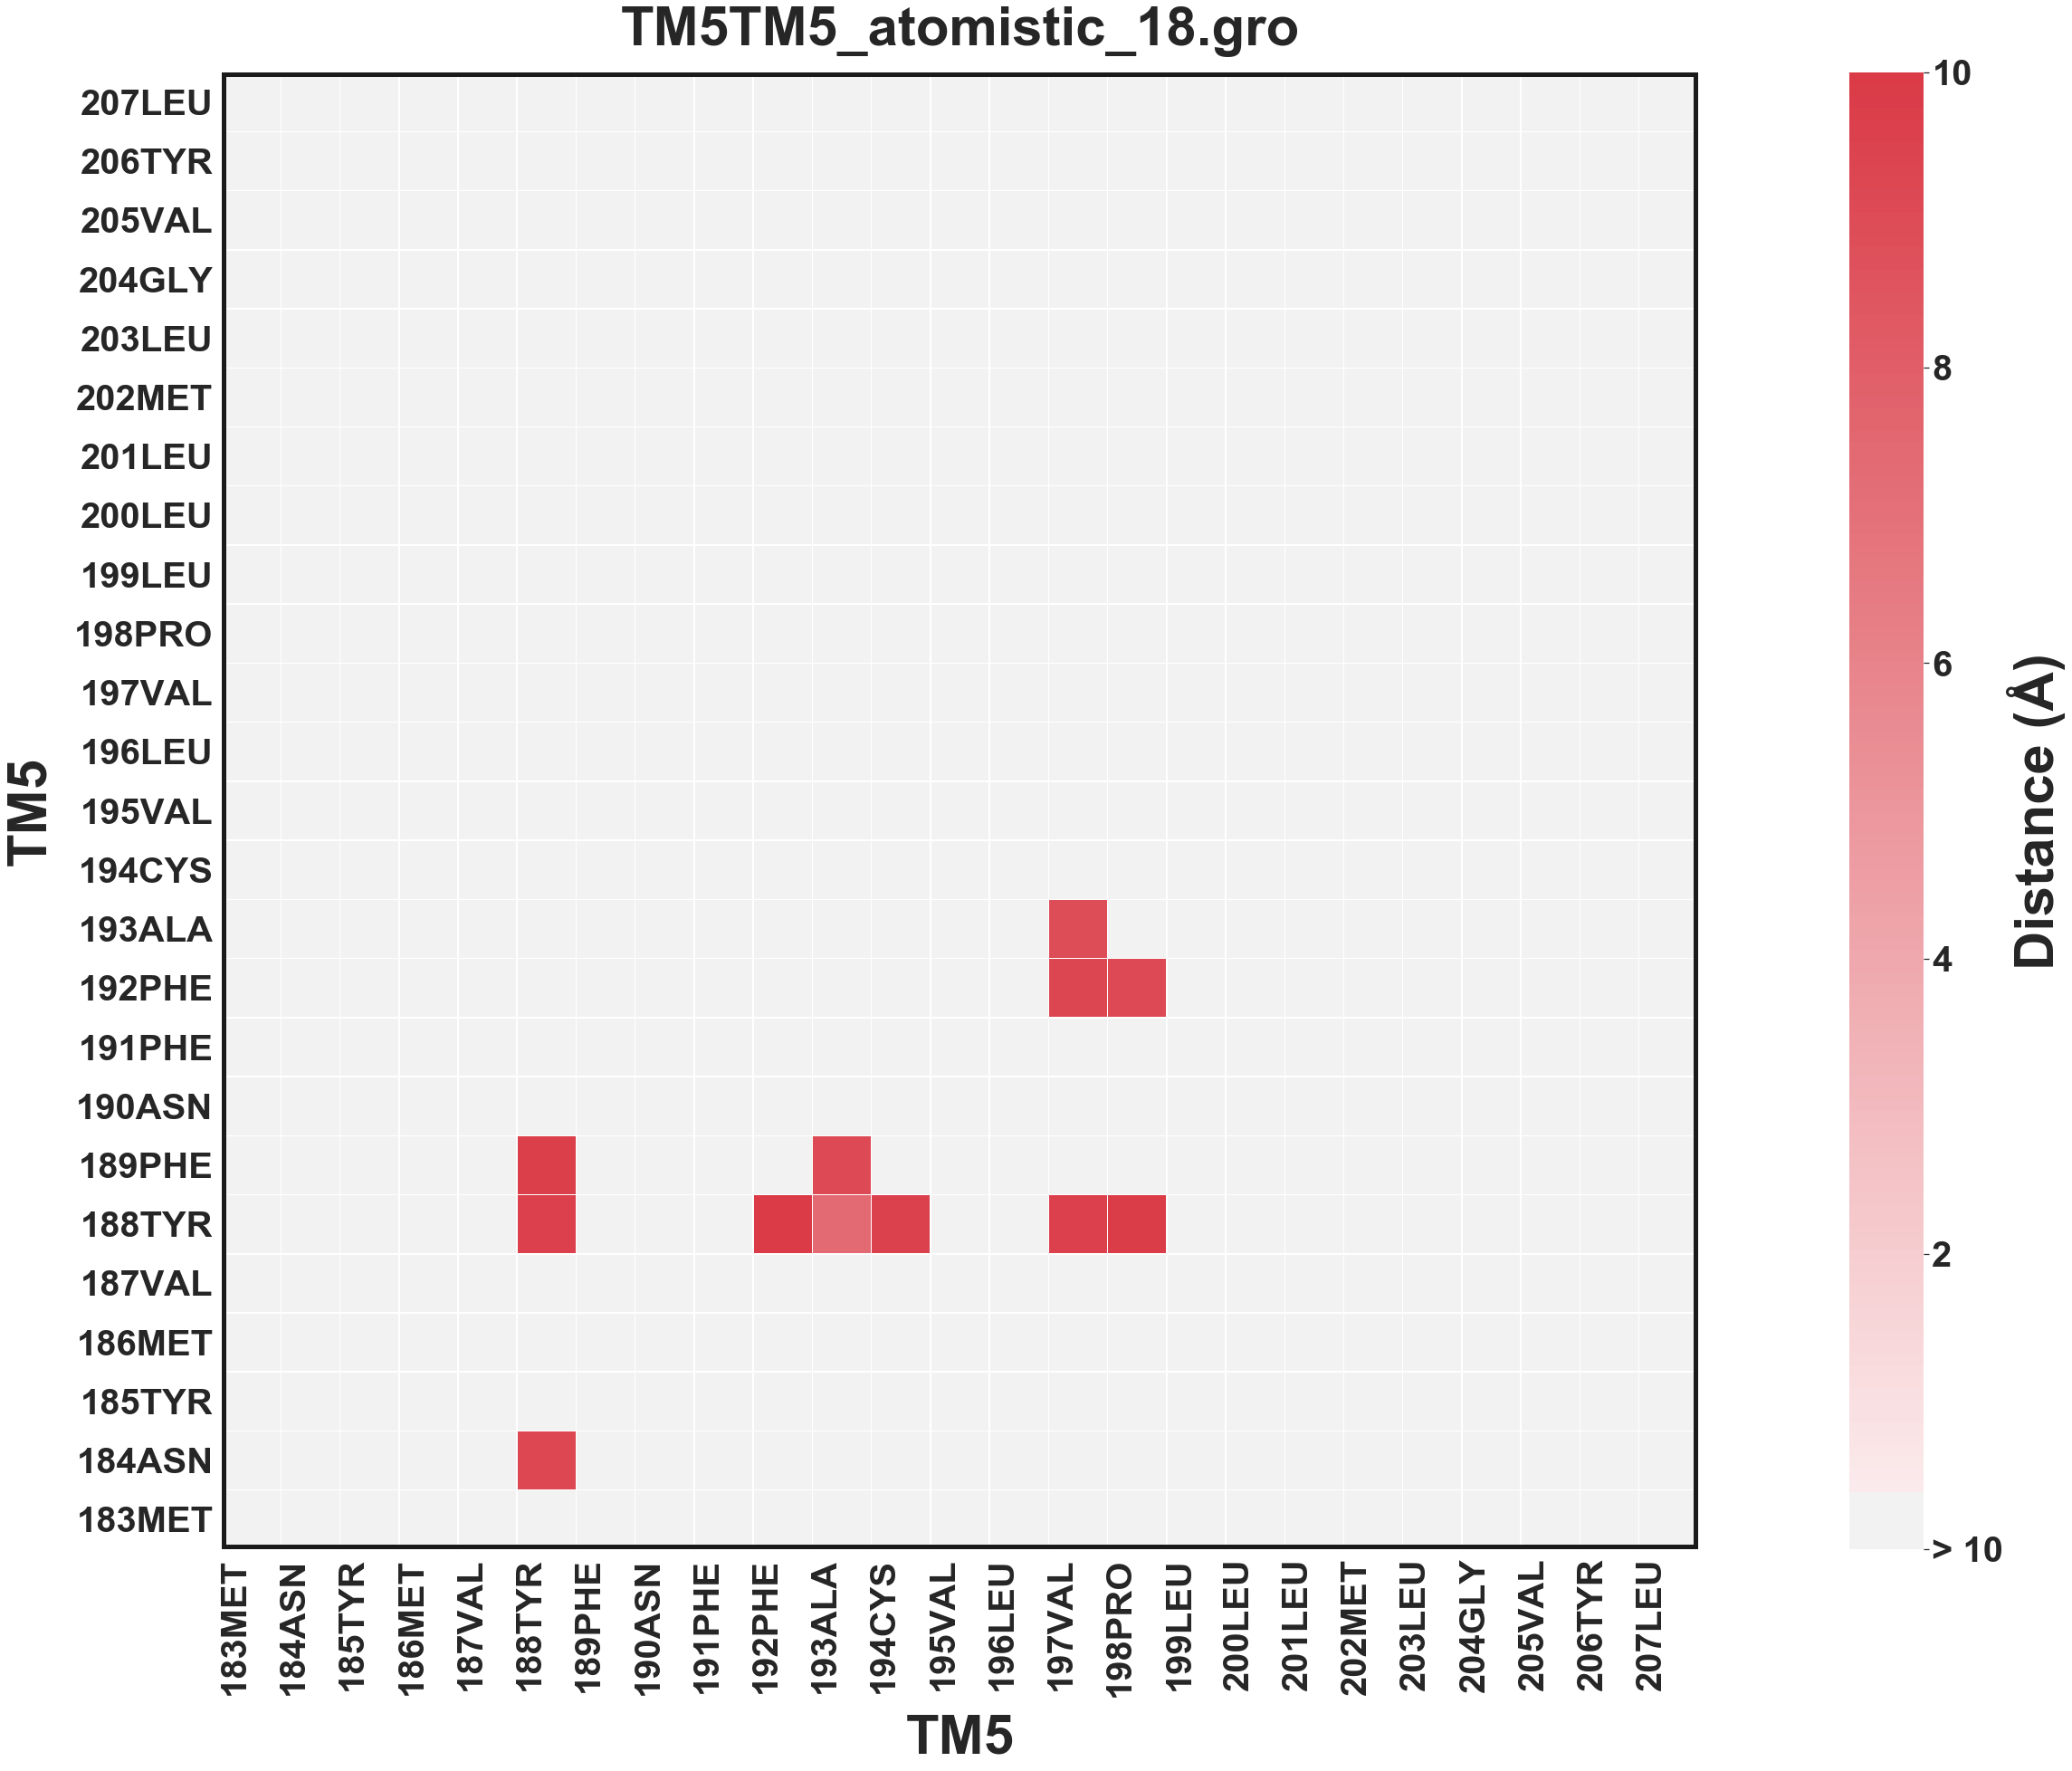

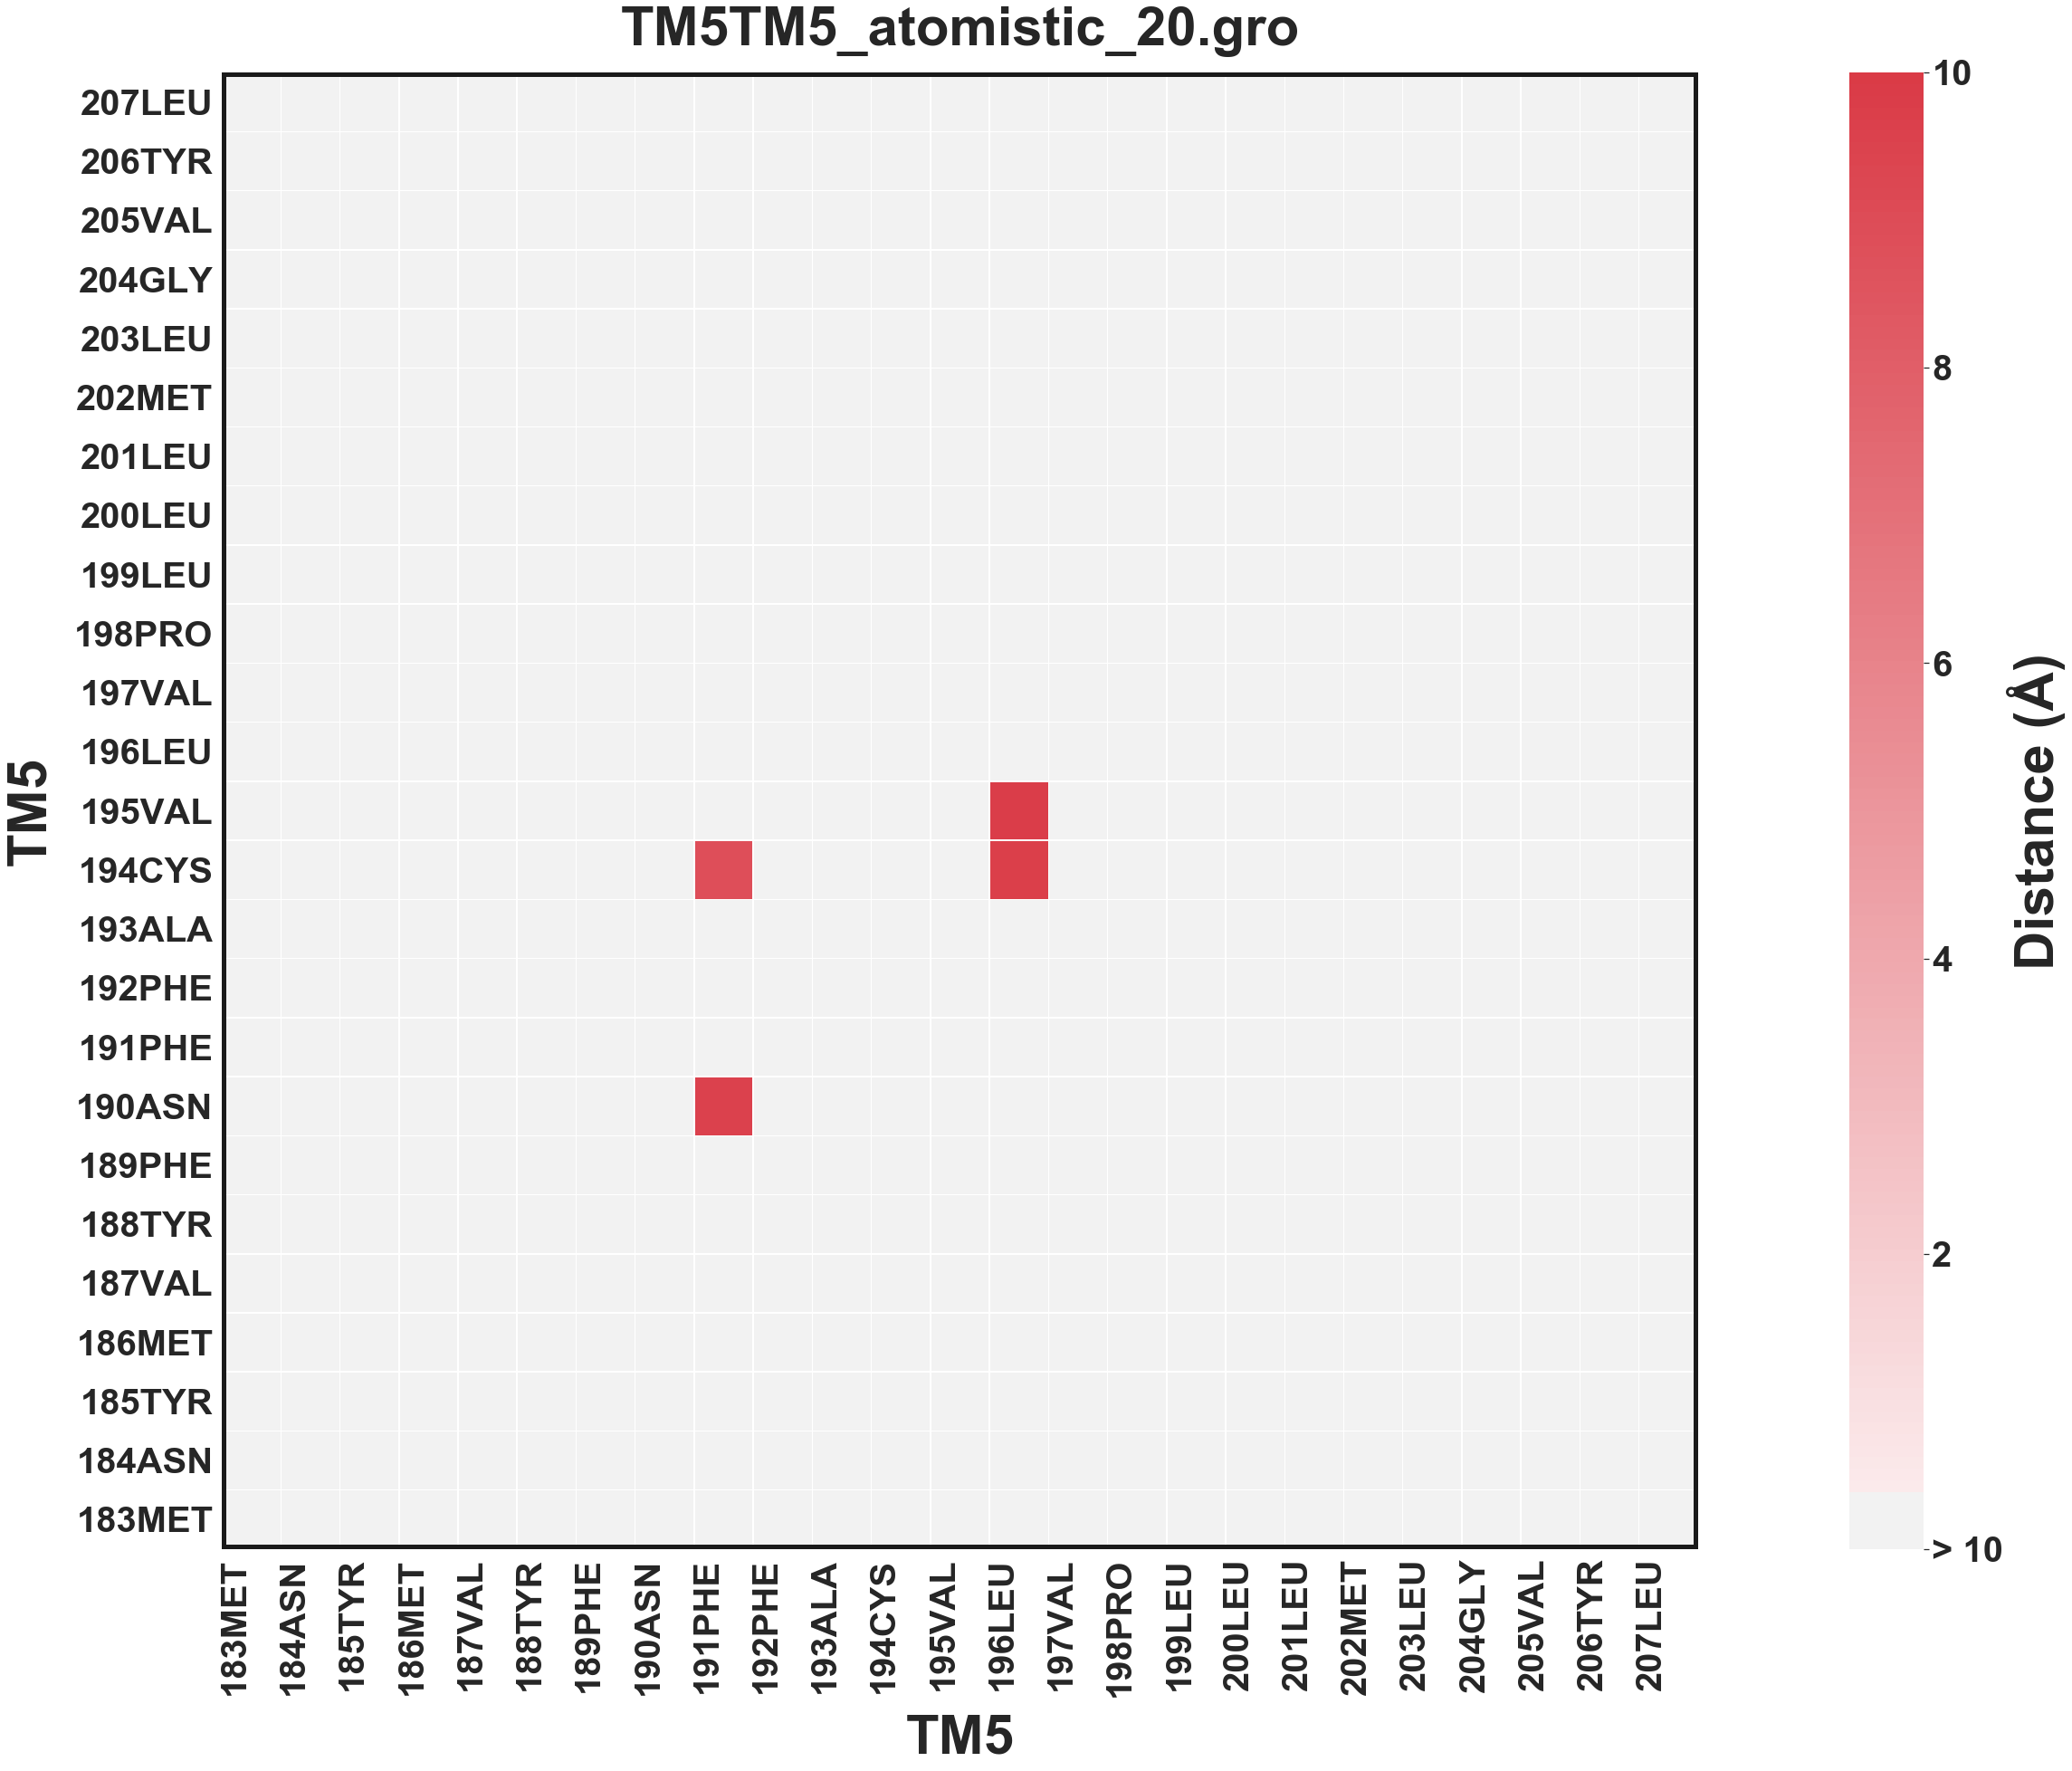

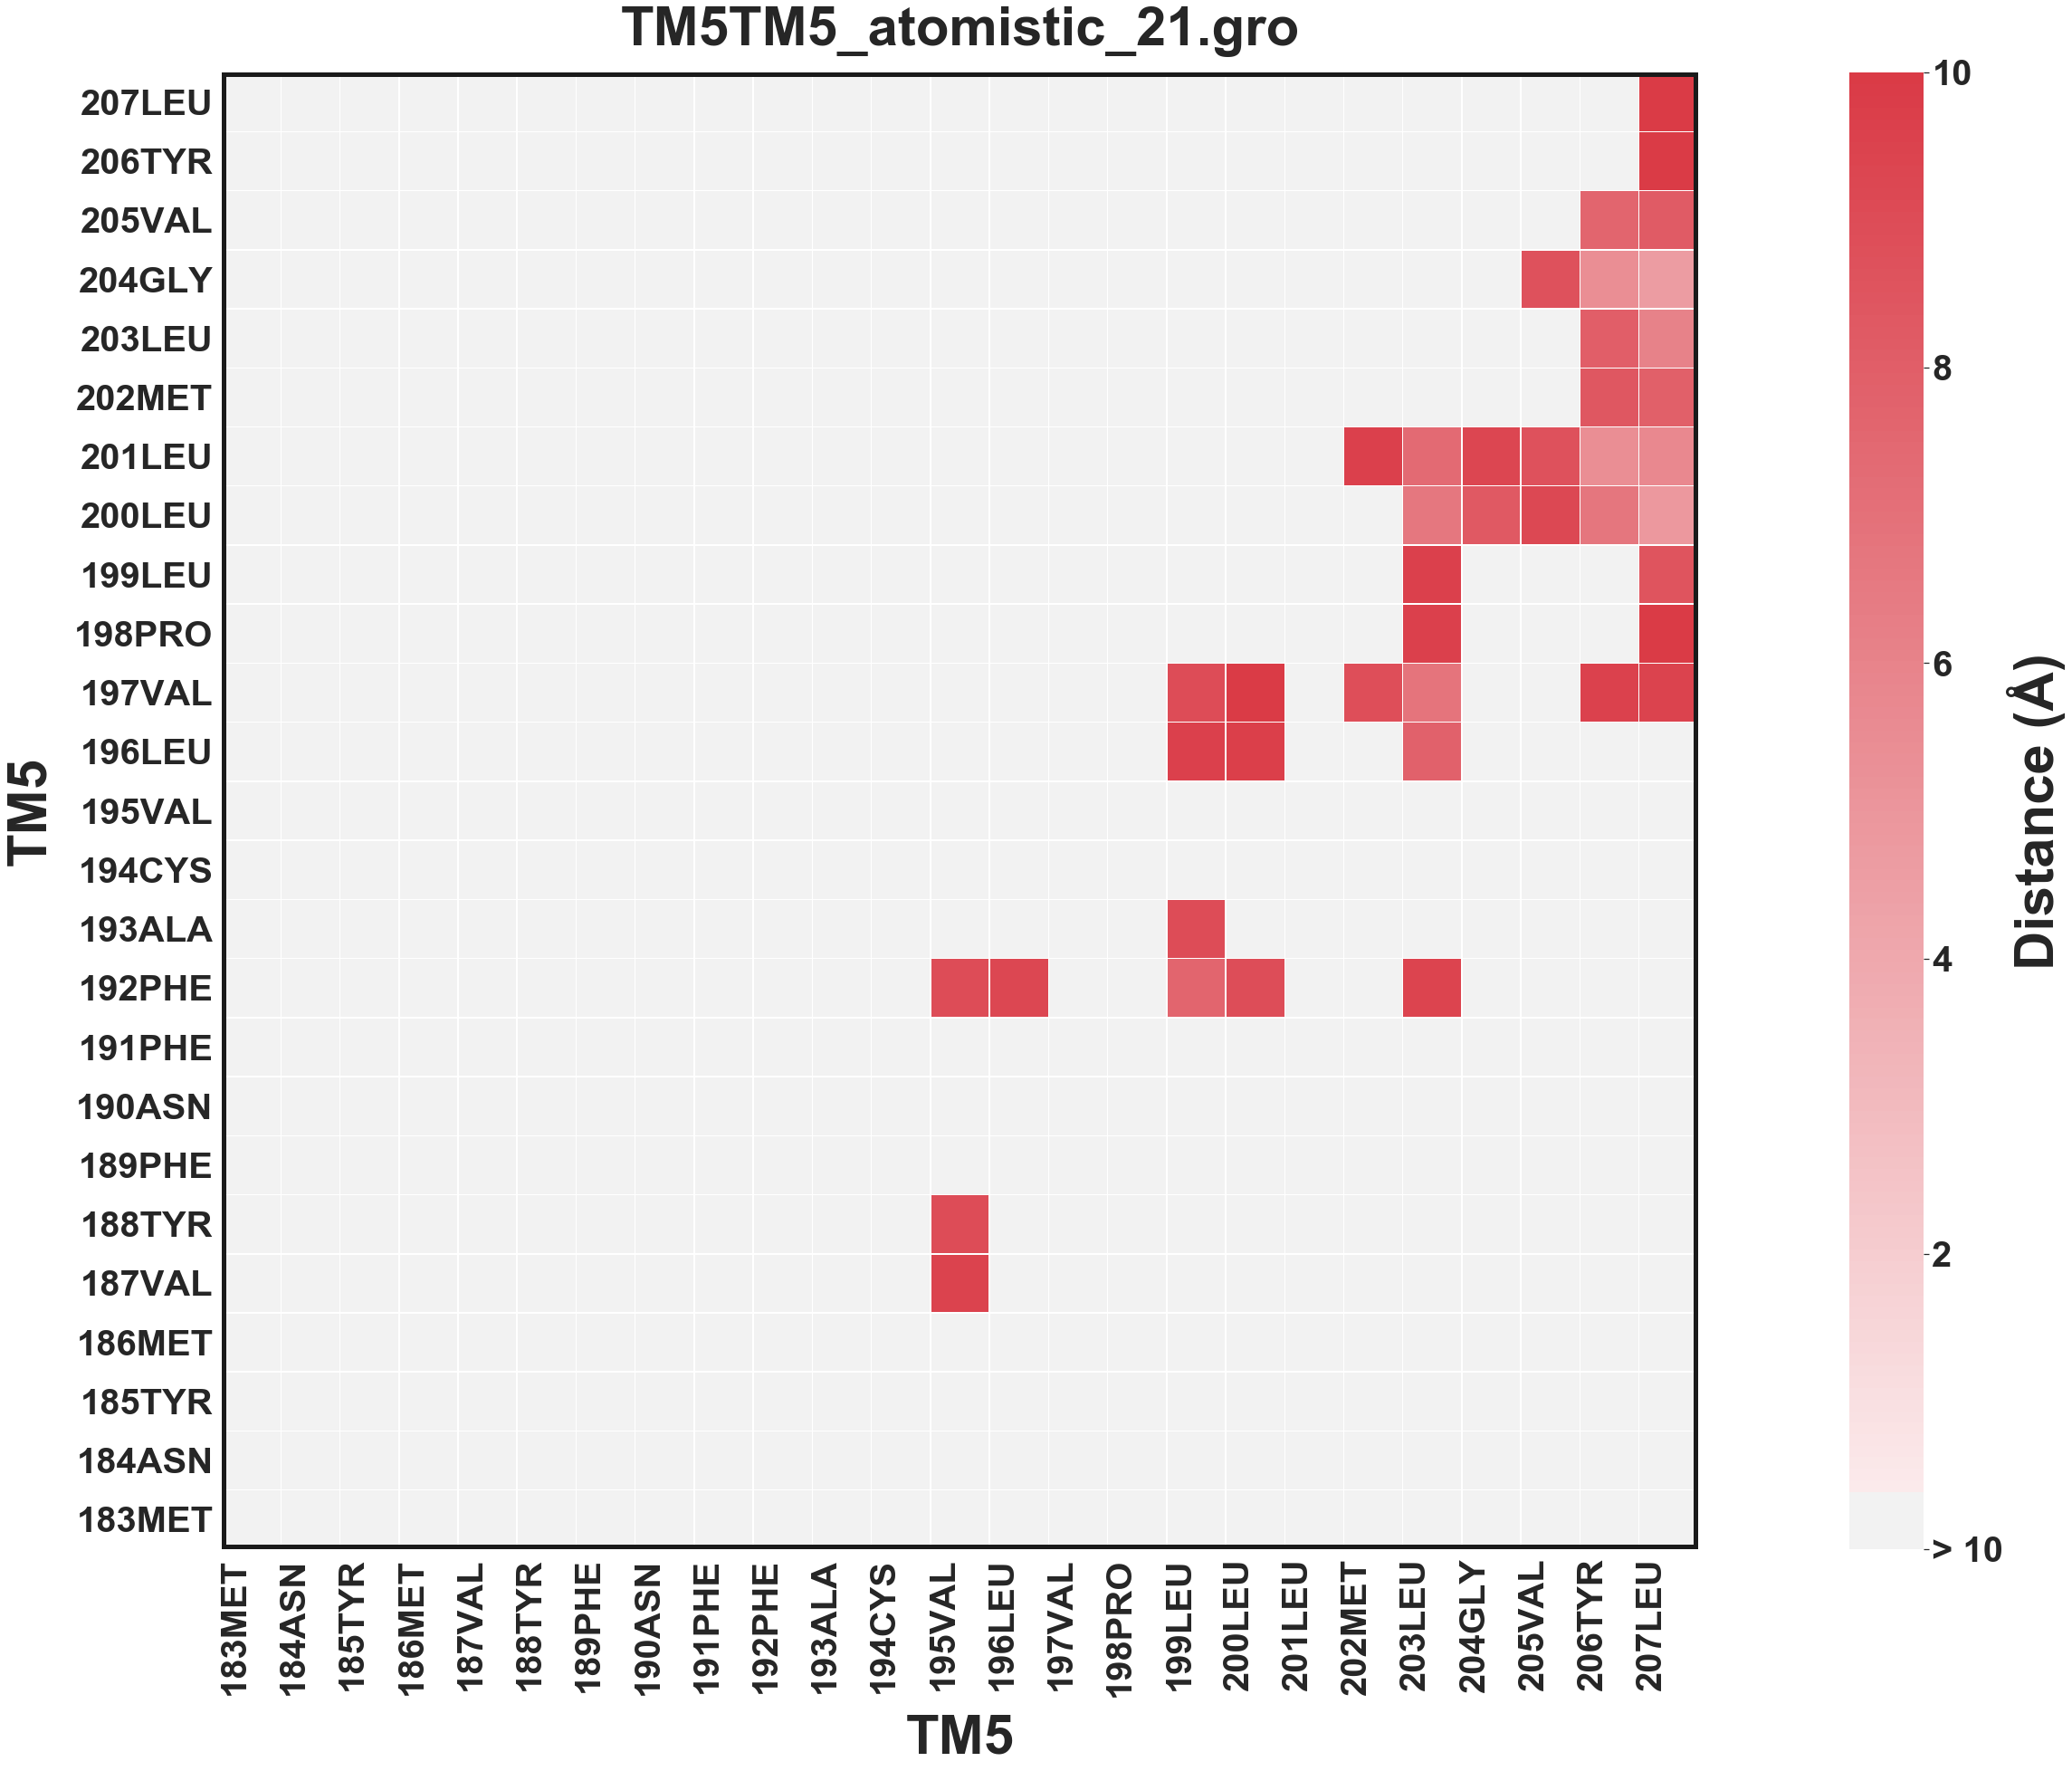

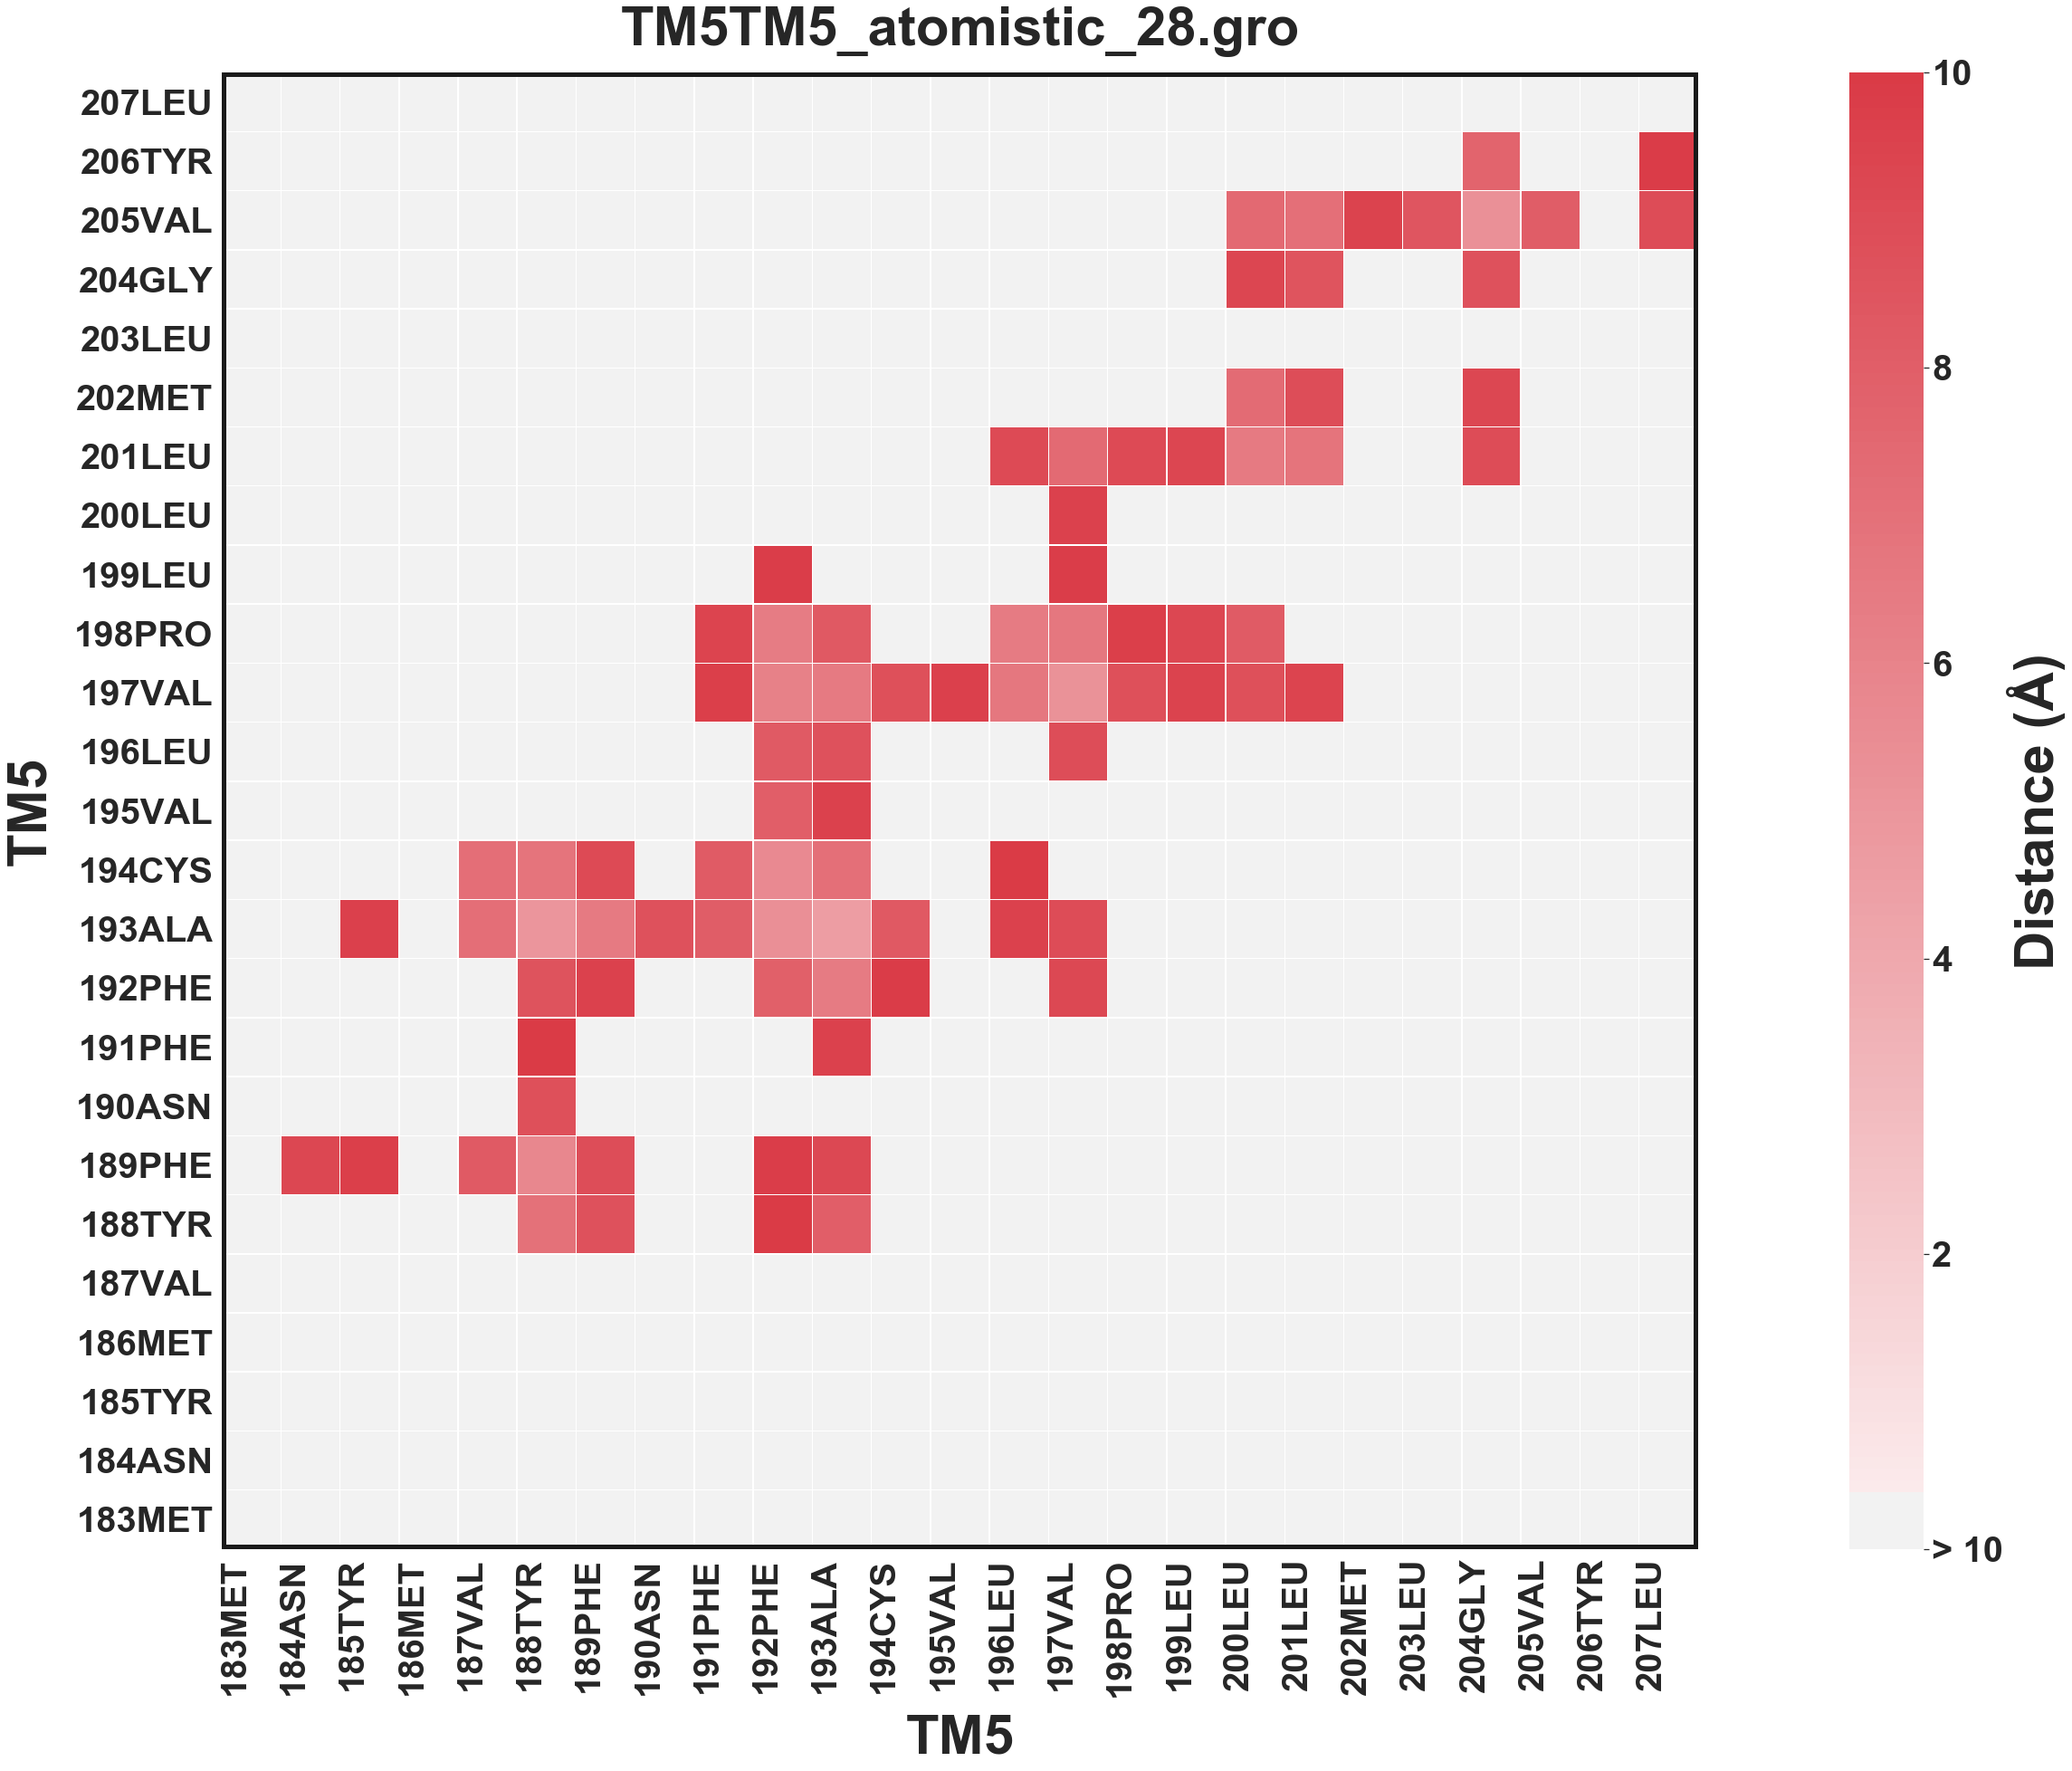

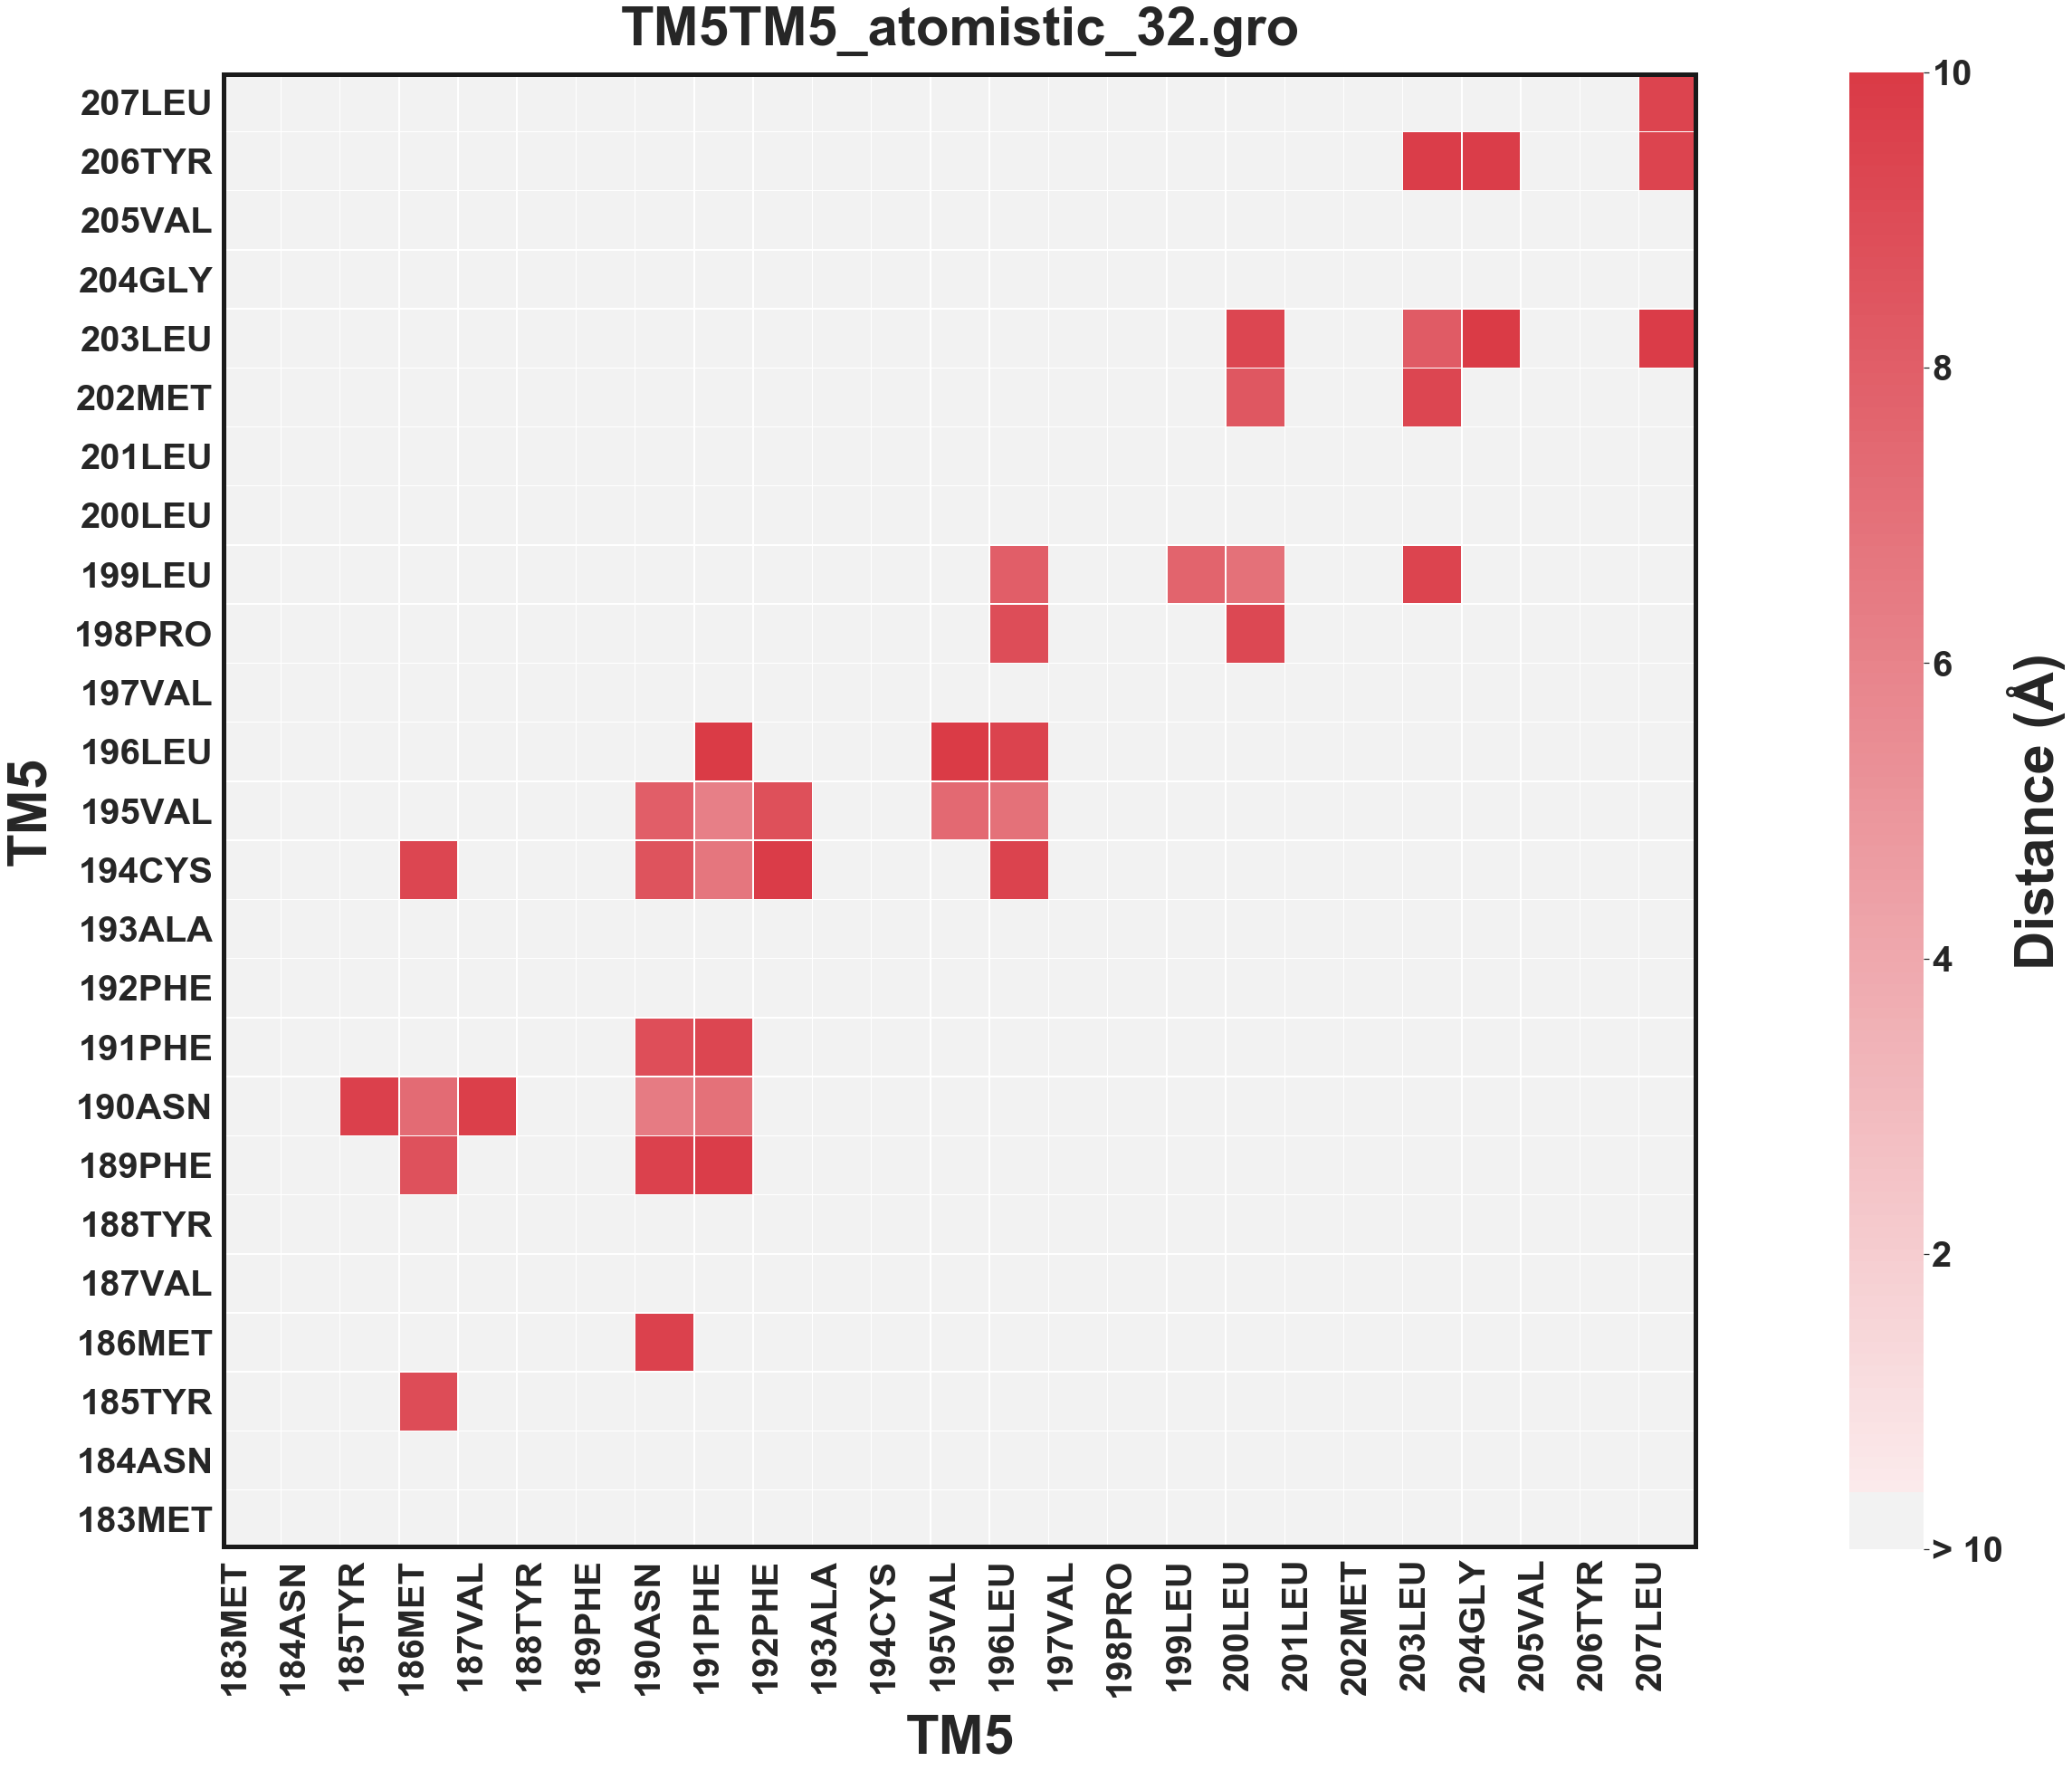

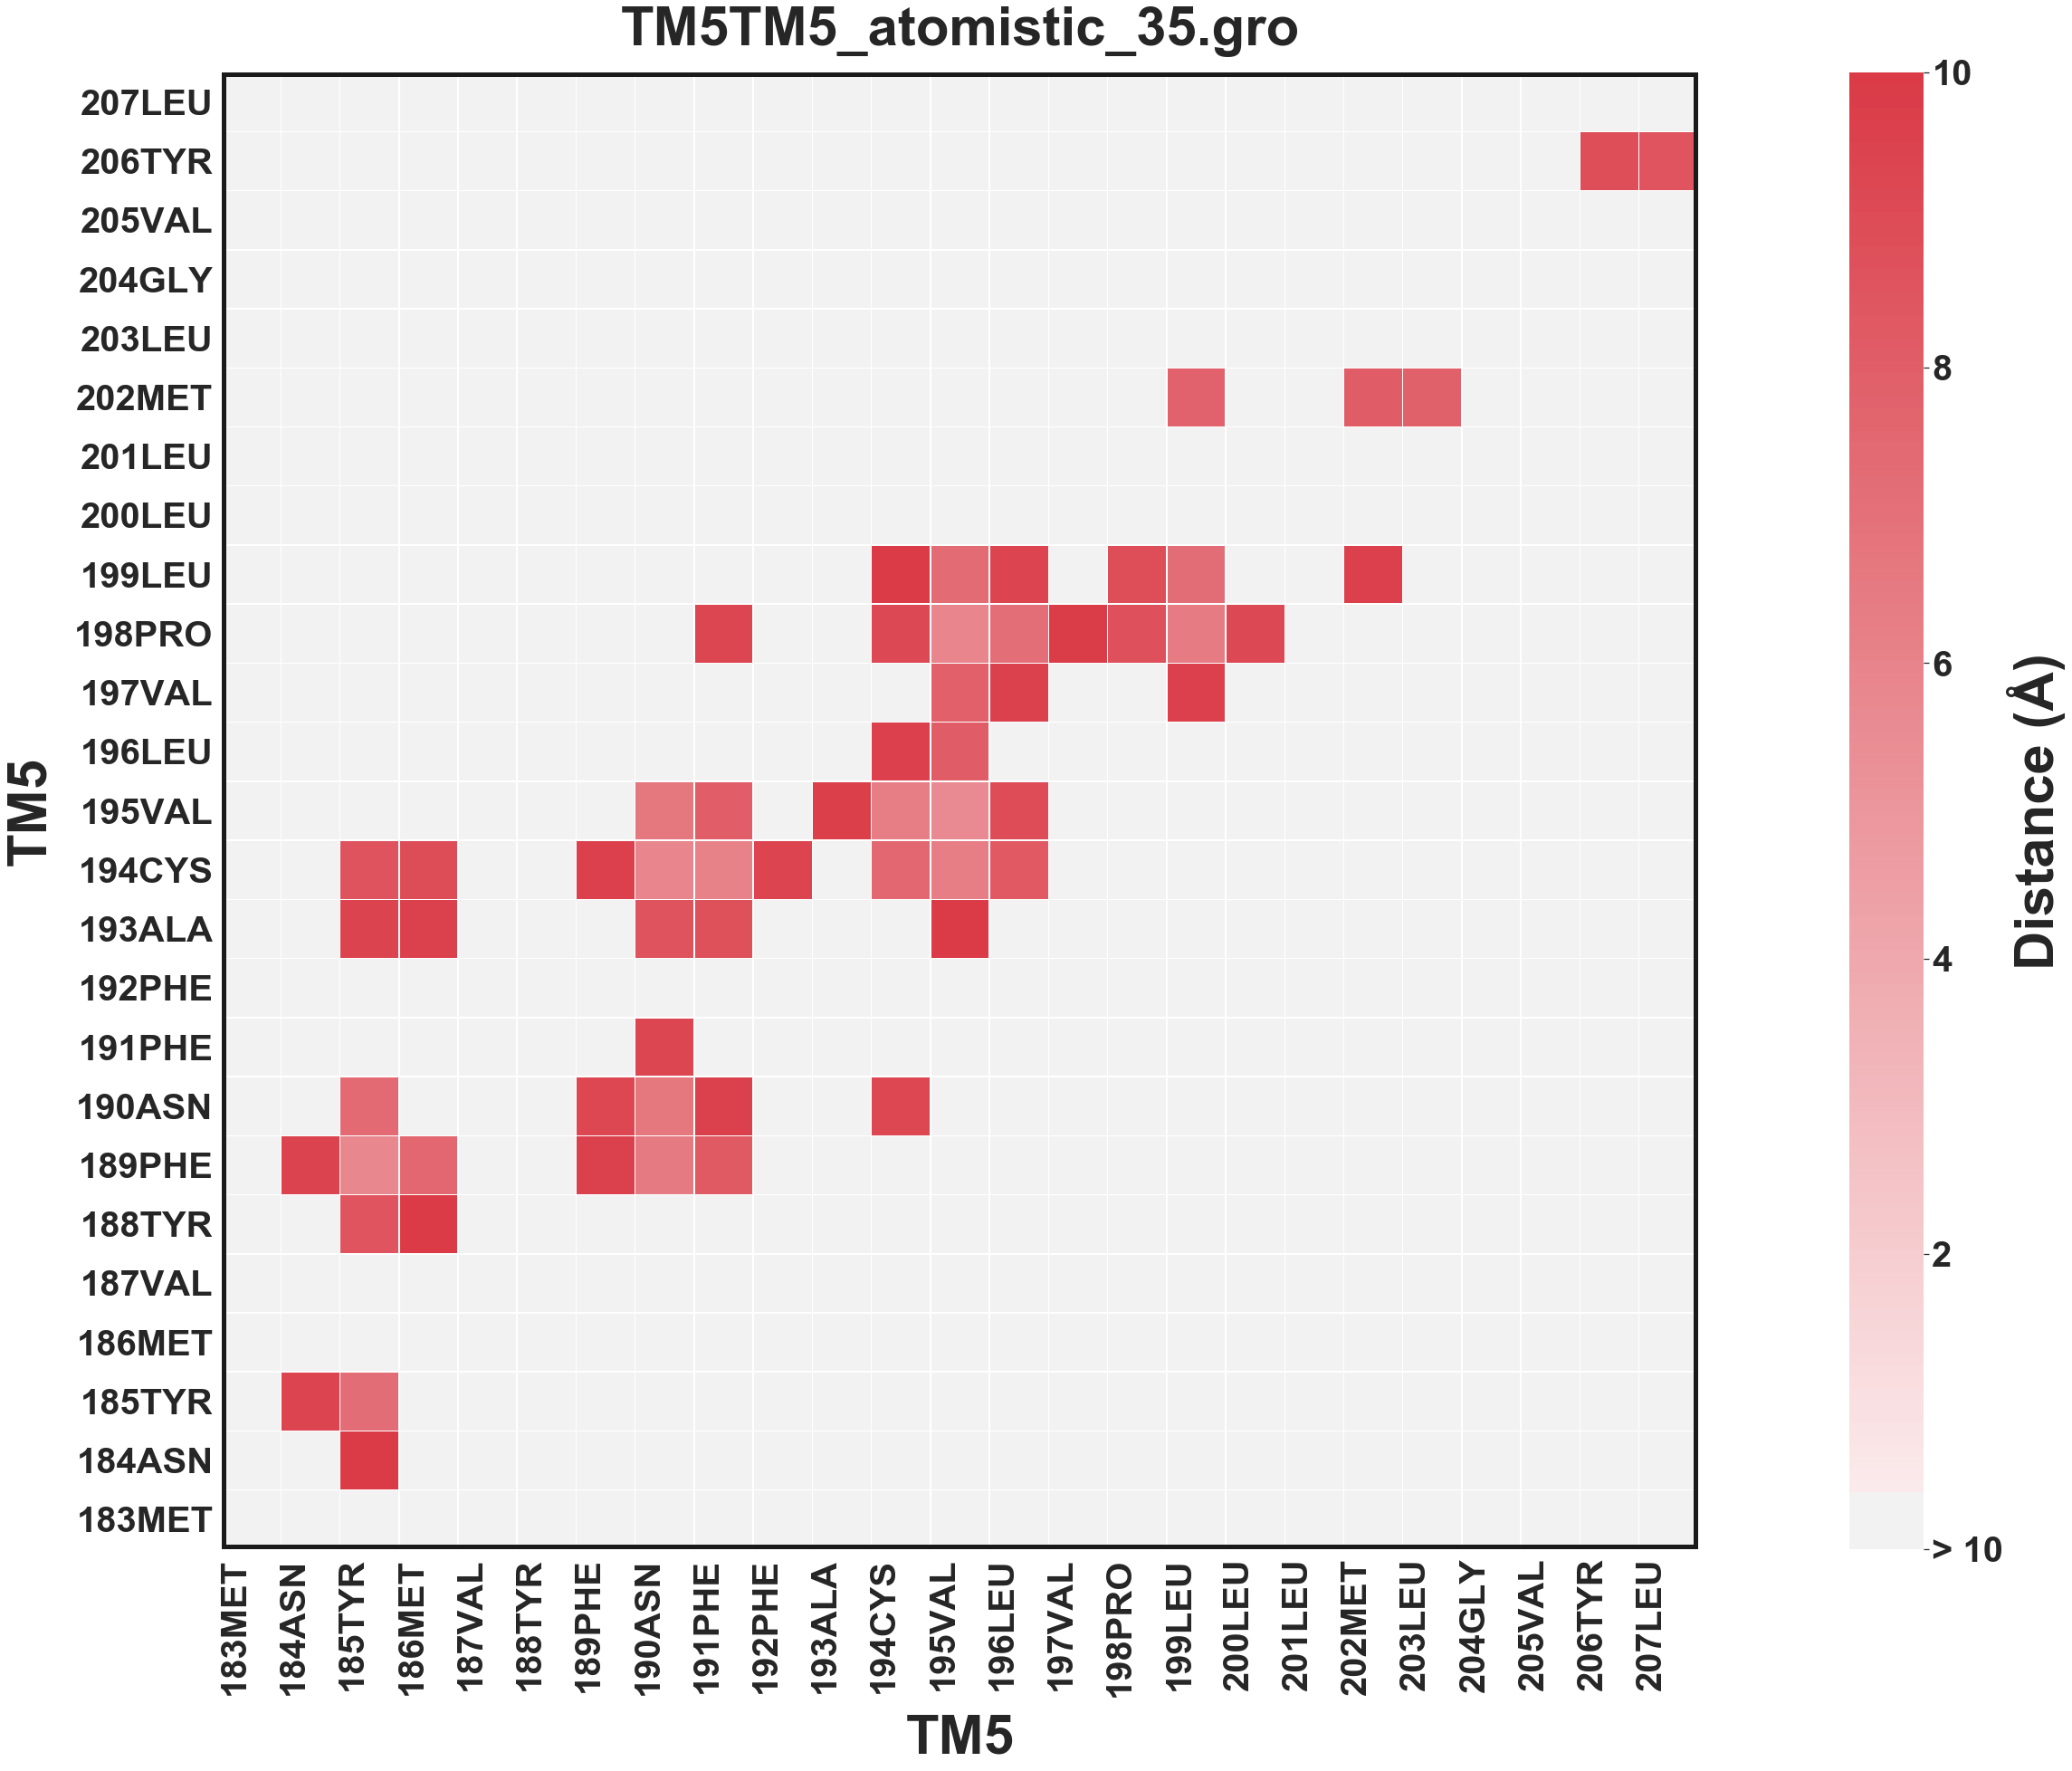

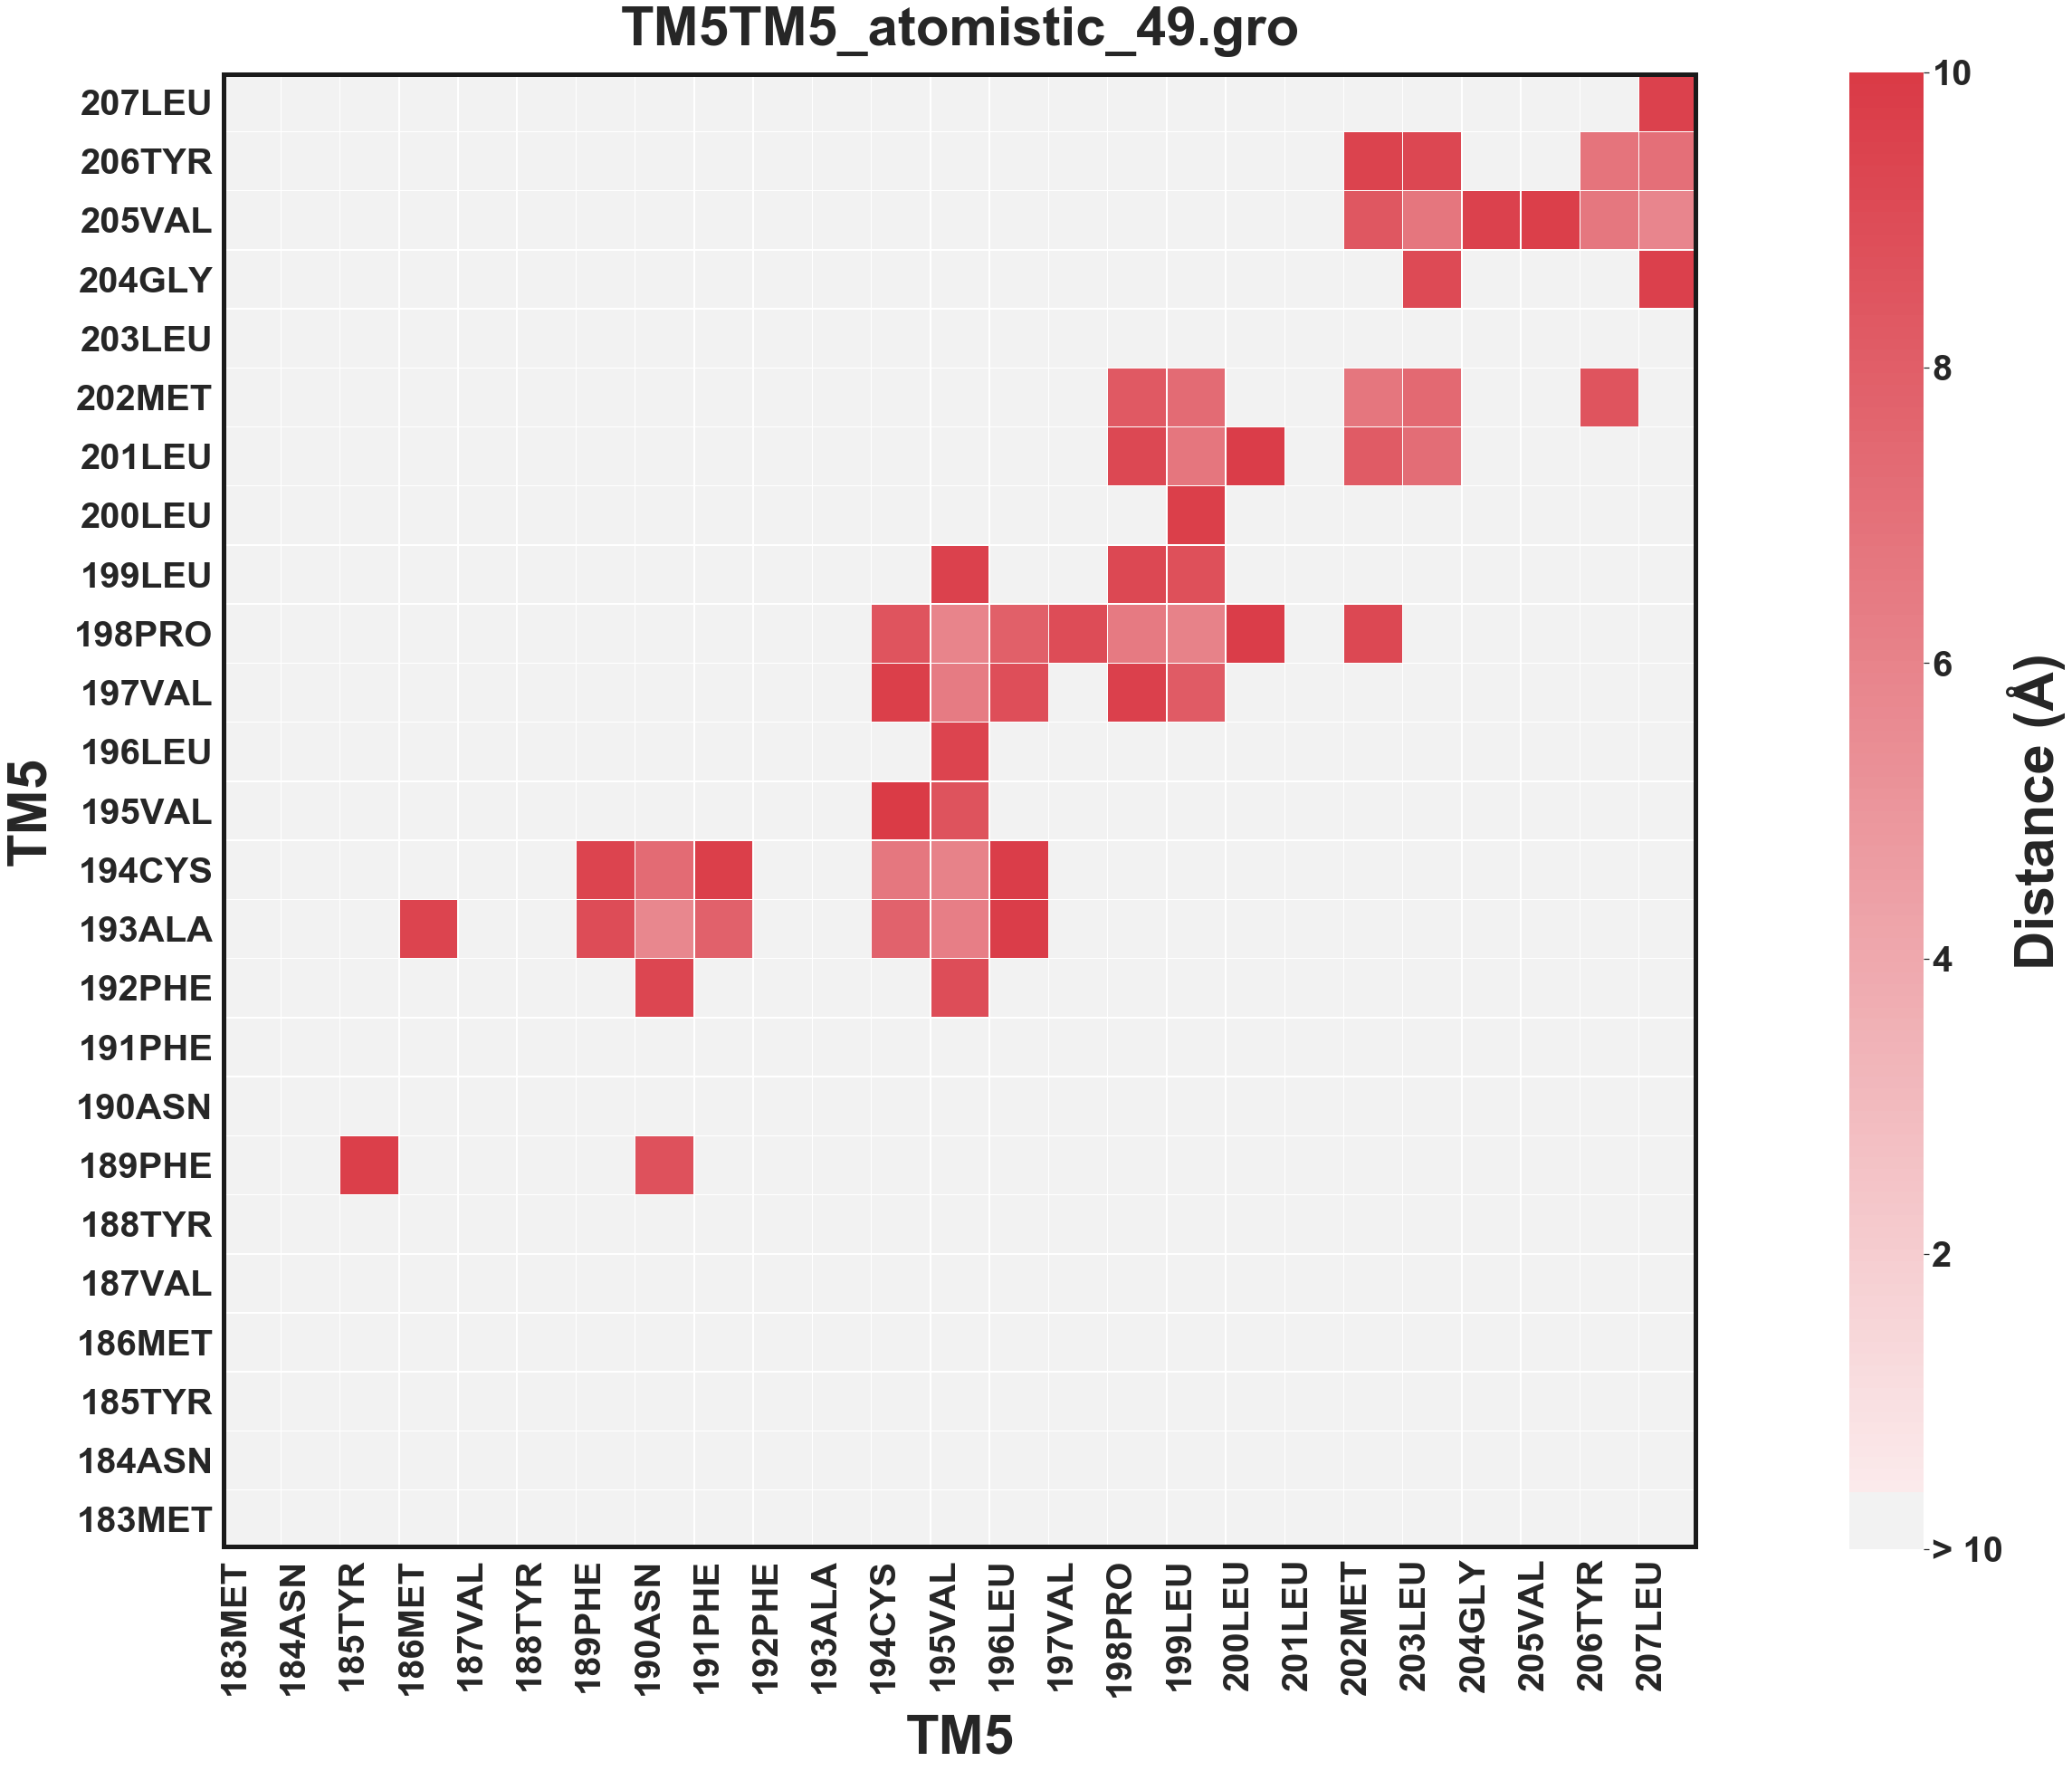

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

#CREATING A HEATMAP FOR ALL REPLICAS WHICH DIMERIZE (backbone distance cutoff <10A)

df_mean=0
df_total=0

# distance_cutoff is the dictionary containing all files and distances below the cutoff
for key, value in distance_cutoff.items():
    
    # Creates a dataframe for each file (key) with residue pairs below 10Angstrom
    df = pd.DataFrame({key:pd.Series(value)})
    #display(df) 
    
    # Creates a dataframe for all file with all residue pairs
    dict_distance_cutoff = pd.DataFrame({ key:pd.Series(value) for key, value in distance_cutoff.items() })
    #display(dict_distance_cutoff)
    
    #Creates a dataframe for invididual files with all residue pairs
    df = pd.DataFrame(dict_distances[key])
    #display(df)
    
    # Data values refer to the distances between the helix pairs
    data_values=[]
    
    # Appending the distances
    for value in dict_distances[key]:
        data_values.append(value[2])
        
    #print(data_values)
    
    # Separating every 25 distances into individual lists for each residue
    
    # THIS NEEDS TO BE EDITED DEPENDING ON THE NUMBER OF RESIDUES IN HELIX B
    coord_list_split = [data_values[x:x+25] for x in range(0, len(data_values), 25)] 
    
    # This creates a dataframe of one replica, with residues as index and columns and distances within the table.
    
    df = pd.DataFrame(coord_list_split, index=TM_helix_A_residues, columns=TM_helix_B_residues)
    #display(df)
    
    # If the distance is greater than 10, convert to 0, so that this distance is not plotted on the heatmap.
    df[df > 10] = 0

    # CONSTRUCTING THE HEATMAP USING SEABORN
    sns.set(style="white")

    # Set the figure up
    f, ax = plt.subplots(figsize=(60, 30))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Construct the heatmap, set minimum and maximum values
    # The maximum value is the distance cutoff 
    sns.heatmap(df, cmap=cmap,  center=0, vmax=10.0, vmin=0.0, square=True, linewidths=0.5)
    
    # Construct matplotlib.colorbar.Colorbar object and format
    cbar = ax.collections[0].colorbar
    cbar.ax.set_yticklabels(['> 10','2','4','6', '8', '10'], fontweight='bold')
    cbar.set_label('Distance (Å)', fontsize=60, fontweight='bold')
    cbar.ax.tick_params(labelsize=40)

    # Set titles and axis labels and formatting
    ax.set_title(key, fontweight='bold', fontsize=60,pad=30)
    ax.set_xlabel('TM5', fontweight='bold', fontsize=60,labelpad=20)
    ax.set_ylabel('TM5', fontweight='bold', fontsize=60,labelpad=20)
    ax.invert_yaxis()
    
    ax.set_xticklabels(
        ax.get_xticklabels(), 
        rotation=90, 
        horizontalalignment='right',
        fontweight='bold',
        fontsize=40)

    ax.set_yticklabels(
        ax.get_yticklabels(),  
        horizontalalignment='right',
        rotation=0,
        fontweight='bold',
        fontsize=40)
    
    ax.axhline(y=0, color='k',linewidth=10)
    ax.axhline(y=df.shape[1], color='k',linewidth=10)
    ax.axvline(x=0, color='k',linewidth=10)
    ax.axvline(x=df.shape[0], color='k',linewidth=10)
   
    f.patch.set_alpha(0)
    plt.savefig(key[0:19],facecolor=f.get_alpha())
    plt.show()
    
    # Saving the dataframe to excel 
    #df.to_excel(key[0:20]+'.xlsx')
    
    # The code below is used to calculate the number of times a 
    # paritcular residue pair interaction occurs in the ensemble
    
    # This is used to create a dataframe to calculate the mean 
    df_mean = df_mean+df
    
    # If you change all values to 1, then you can add all the dataframes together (df_total). 
    df[df > 0] = 1
    
    df_total=df_total+df



In [4]:
# This tells you the number of times a residue pair interaction occurs in an ensemble
#print(df_total)

In [5]:
# This calculates the mean by dividing the added distances together by the number of times that interaction occurs
#print(df_mean)

divisionResults = df_mean.div(df_total)
mean = pd.DataFrame(data=divisionResults)
mean

# Saving these results to an excel spreadsheet
#divisionResults.to_excel('A2A_TM5TM5_martini_EN_mean'+'.xlsx')

183MET    184ASN    185TYR    186MET    187VAL    188TYR    189PHE  \
183MET     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
184ASN     NaN       NaN  9.933041       NaN       NaN  9.255344       NaN   
185TYR     NaN  9.440440  7.250214  8.991468       NaN       NaN       NaN   
186MET     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
187VAL     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
188TYR     NaN       NaN  8.519307  9.959844       NaN  8.344212  8.734718   
189PHE     NaN  9.346607  8.432732  8.106429  8.230492  7.799542  9.272046   
190ASN     NaN       NaN  8.526502  7.266381  9.737356  8.770610  9.278820   
191PHE     NaN       NaN       NaN       NaN       NaN  9.925009       NaN   
192PHE     NaN       NaN       NaN       NaN       NaN  8.596796  9.561684   
193ALA     NaN       NaN  9.544420  9.497658  7.152091  5.027773  7.780141   
194CYS     NaN       NaN  8.665991  9.147980  7.119944  6.852394  9.395920   
195VAL     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
196LEU     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
197VAL     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
198PRO     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
199LEU     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
200LEU     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
201LEU     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
202MET     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
203LEU     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
204GLY     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
205VAL     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
206TYR     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
207LEU     NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          190ASN    191PHE    192PHE    ...       198PRO    199LEU    200LEU  \
183MET       NaN       NaN       NaN    ...          NaN       NaN       NaN   
184ASN       NaN       NaN       NaN    ...          NaN       NaN       NaN   
185TYR       NaN       NaN       NaN    ...          NaN       NaN       NaN   
186MET  9.600750       NaN       NaN    ...          NaN       NaN       NaN   
187VAL       NaN       NaN       NaN    ...          NaN       NaN       NaN   
188TYR       NaN       NaN  9.949250    ...     9.849213       NaN       NaN   
189PHE  8.258202  9.046909  9.834023    ...          NaN       NaN       NaN   
190ASN  6.545111  8.715935       NaN    ...          NaN       NaN       NaN   
191PHE  9.091410  9.340364       NaN    ...          NaN       NaN       NaN   
192PHE  9.298505       NaN  7.946257    ...     9.065854  7.654593  8.981481   
193ALA  7.730503  8.237226  5.375556    ...          NaN  9.044899       NaN   
194CYS  7.275136  7.907597  8.320530    ...          NaN       NaN       NaN   
195VAL  7.348333  7.094070  8.431068    ...          NaN       NaN       NaN   
196LEU       NaN  9.946351  8.227673    ...          NaN  9.644574  9.705957   
197VAL       NaN  9.718488  6.100664    ...     9.197016  9.065780  9.362567   
198PRO       NaN  9.363550  6.377507    ...     8.341320  7.238238  9.062683   
199LEU       NaN       NaN  9.824709    ...     9.007136  7.928071  7.025852   
200LEU       NaN       NaN       NaN    ...          NaN  9.746040       NaN   
201LEU       NaN       NaN       NaN    ...     9.159202  8.048585  8.161722   
202MET       NaN       NaN       NaN    ...     8.329448  7.533114  7.825567   
203LEU       NaN       NaN       NaN    ...          NaN       NaN  9.321019   
204GLY       NaN       NaN       NaN    ...          NaN       NaN  9.333456   
205VAL       NaN       NaN       NaN    ...          NaN       NaN  7.463551   
206TYR       NaN       NaN       NaN    ...          NaN   

In [6]:
# This allows you to calculate the standard deviation

directory="../A2A_TM5TM5_martini_EN_analysis"
df_list=[]
for file in os.listdir(directory):
    if 'TM5TM5_atomistic' and '..xlsx' in file:
        print(file) #Check that the right files are being read 
        df_file = pd.read_excel(file) 
        #print(df_file)
        df_list.append(df_file)
        #print(len(df_list))
        #print(df_list)    
#print(pd.std(df_list))

p = pd.Panel({n: df for n, df in enumerate(df_list)})
p.std(axis=0)

TM5TM5_atomistic_18..xlsx
TM5TM5_atomistic_20..xlsx
TM5TM5_atomistic_21..xlsx
TM5TM5_atomistic_28..xlsx
TM5TM5_atomistic_32..xlsx
TM5TM5_atomistic_35..xlsx
TM5TM5_atomistic_49..xlsx


/Users/hannaalmetrami/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


183MET    184ASN    185TYR    186MET    187VAL    188TYR    189PHE  \
183MET     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
184ASN     0.0  0.000000  3.754337  0.000000  0.000000  3.498191  0.000000   
185TYR     0.0  3.568151  2.740323  3.398456  0.000000  0.000000  0.000000   
186MET     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
187VAL     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
188TYR     0.0  0.000000  3.219996  3.764467  0.000000  4.141998  3.301413   
189PHE     0.0  4.561194  4.690764  3.970446  3.110834  3.971147  4.528204   
190ASN     0.0  0.000000  4.207225  2.746434  3.680375  3.314979  3.507064   
191PHE     0.0  0.000000  0.000000  0.000000  0.000000  3.751301  0.000000   
192PHE     0.0  0.000000  0.000000  0.000000  0.000000  3.249283  3.613977   
193ALA     0.0  0.000000  4.657420  4.634548  2.703236  1.900320  3.862134   
194CYS     0.0  0.000000  3.275437  4.464840  2.691086  2.589961  5.024929   
195VAL     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
196LEU     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
197VAL     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
198PRO     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
199LEU     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
200LEU     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
201LEU     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
202MET     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
203LEU     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
204GLY     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
205VAL     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
206TYR     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
207LEU     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          190ASN    191PHE    192PHE    ...       198PRO    199LEU    200LEU  \
183MET  0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.000000   
184ASN  0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.000000   
185TYR  0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.000000   
186MET  3.628742  0.000000  0.000000    ...     0.000000  0.000000  0.000000   
187VAL  0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.000000   
188TYR  0.000000  0.000000  4.854745    ...     3.722653  0.000000  0.000000   
189PHE  4.506880  4.436963  3.716911    ...     0.000000  0.000000  0.000000   
190ASN  3.194205  4.735766  0.000000    ...     0.000000  0.000000  0.000000   
191PHE  4.438684  3.530326  0.000000    ...     0.000000  0.000000  0.000000   
192PHE  3.514505  0.000000  3.003403    ...     3.426571  2.893164  3.394681   
193ALA  4.238114  4.412400  2.031769    ...     0.000000  3.418651  0.000000   
194CYS  3.970771  4.045132  4.642940    ...     0.000000  0.000000  0.000000   
195VAL  3.605126  3.500621  4.120125    ...     0.000000  0.000000  0.000000   
196LEU  0.000000  3.759367  3.109768    ...     0.000000  3.645306  3.668507   
197VAL  0.000000  3.673243  2.305834    ...     4.495065  4.869187  4.581743   
198PRO  0.000000  4.569048  2.410471    ...     4.557998  3.996330  4.867793   
199LEU  0.000000  0.000000  3.713391    ...     4.396159  4.261884  2.655523   
200LEU  0.000000  0.000000  0.000000    ...     0.000000  3.683657  0.000000   
201LEU  0.000000  0.000000  0.000000    ...     4.469249  3.997875  4.088994   
202MET  0.000000  0.000000  0.000000    ...     3.148235  3.678188  3.831388   
203LEU  0.000000  0.000000  0.000000    ...     0.000000  0.000000  3.523014   
204GLY  0.000000  0.000000  0.000000    ...     0.000000  0.000000  3.527715   
205VAL  0.000000  0.000000  0.000000    ...     0.000000  0.000000  2.820957   
206TYR  0.000000  0.000000  0.000000    ...     0.000000  0

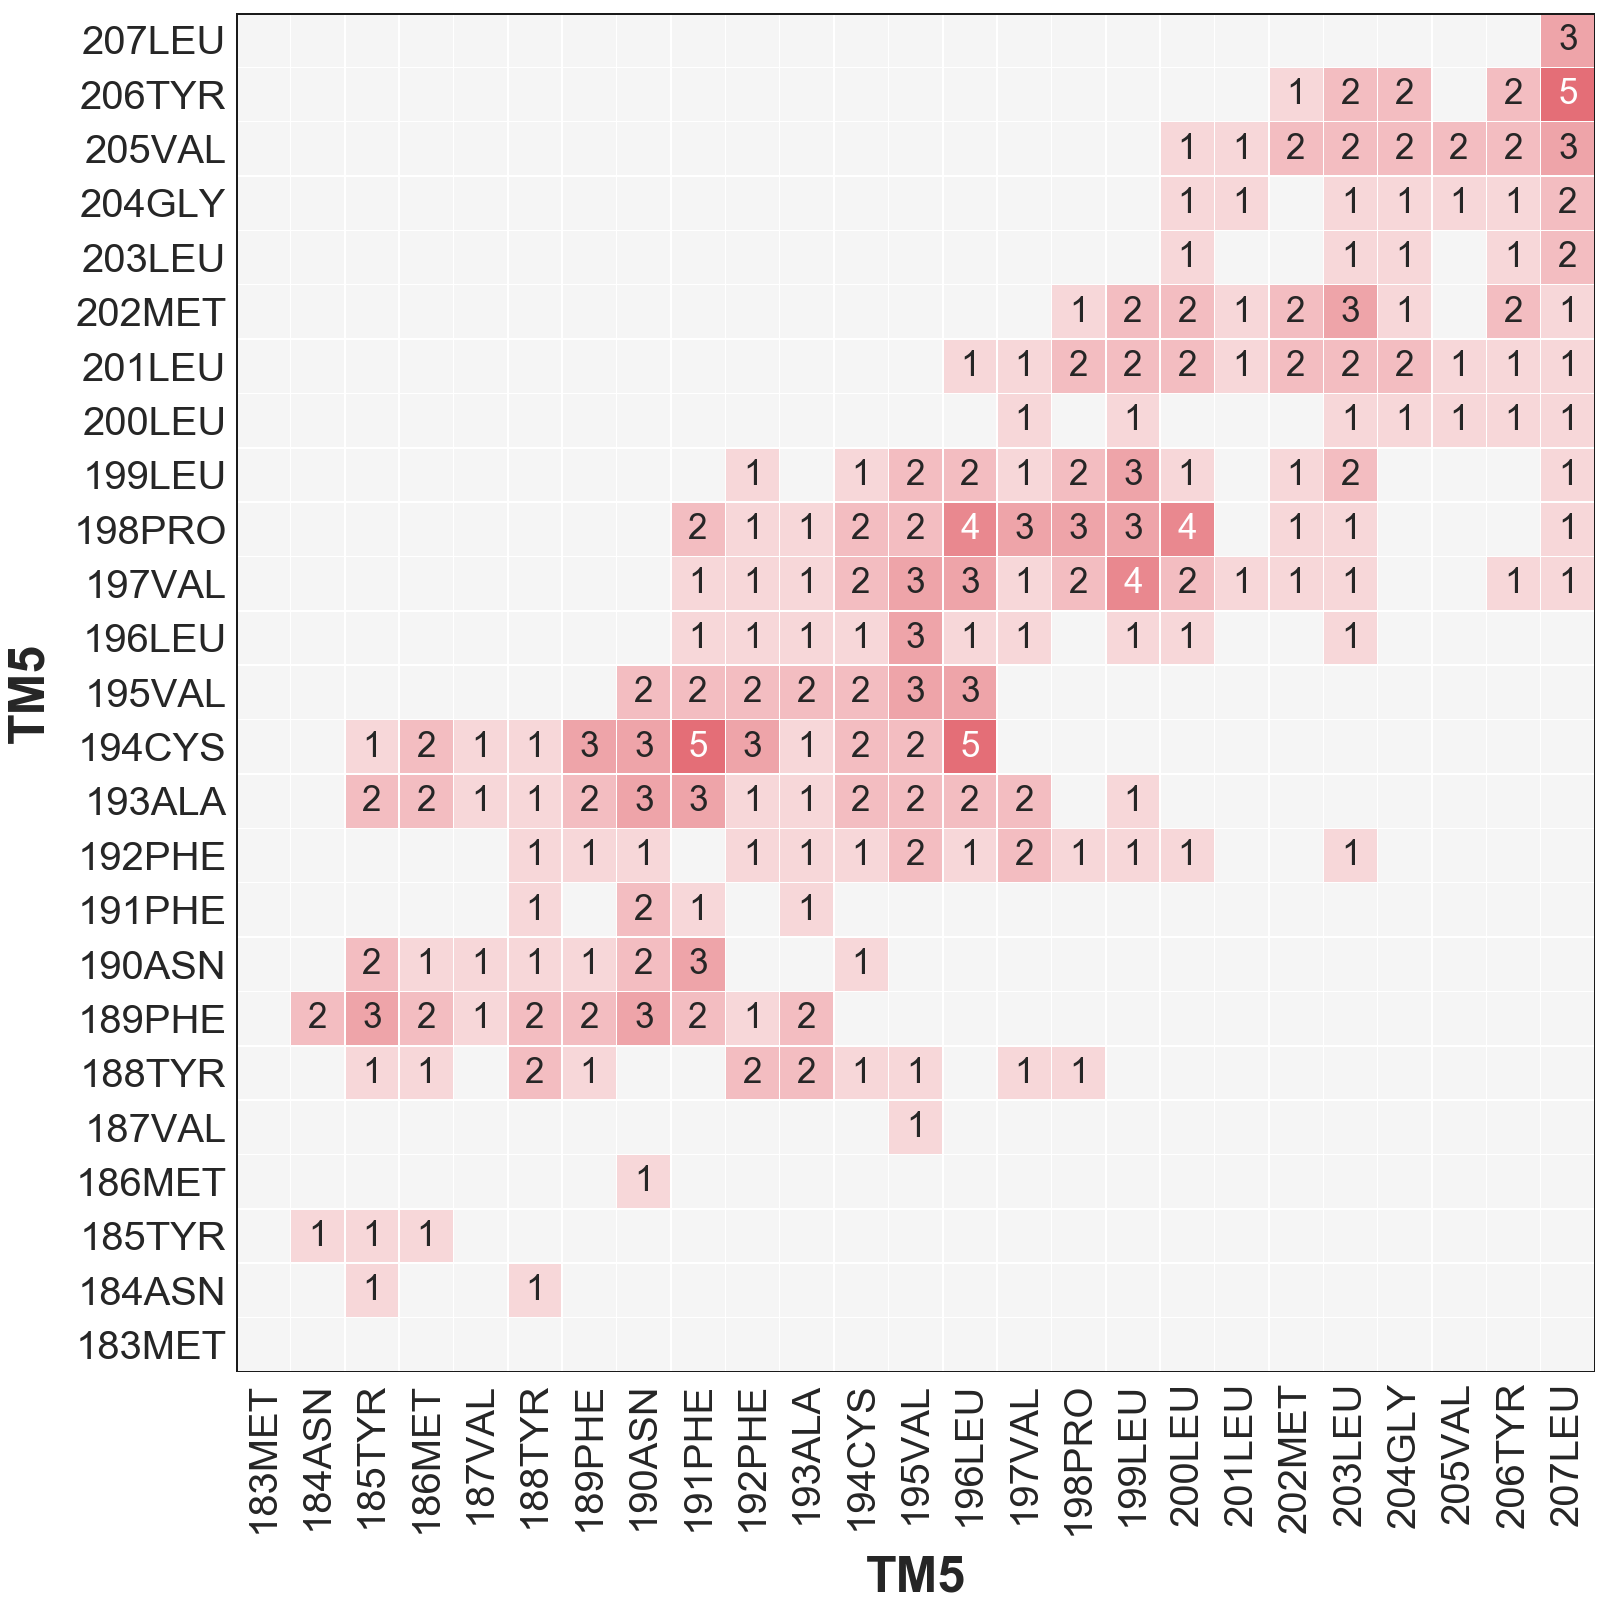

In [7]:
# HEATMAP TO SHOW HOW MANY TIMES WE SEE THIS RESIDUE INTERACTION OCCURING
#print(df_total)
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

# CONSTRUCTING THE HEATMAP USING SEABORN
sns.set(style="white")

# Set the figure up
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask=(df_total==0)

# Construct the heatmap, set minimum and maximum values
sns.heatmap(df_total, cmap=cmap, mask=mask, center=0, vmax=7.0, vmin=0.0, square=True, linewidths=0.5,annot=True, annot_kws={"size": 35}, cbar=None)

# Set titles and axis labels and formatting
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=90, 
    fontsize=40)

ax.set_yticklabels(
    ax.get_yticklabels(),  
    rotation=0,
    fontsize=40)

ax.axhline(y=0, color='k',linewidth=3)
ax.axhline(y=df.shape[0], color='k',linewidth=3)
ax.axvline(x=0, color='k',linewidth=3)
ax.axvline(x=df.shape[0], color='k',linewidth=3)

ax.set_facecolor("whitesmoke")
f.patch.set_alpha(0)

ax.set_xlabel('TM5', fontweight='bold', fontsize=50,labelpad=20)
ax.set_ylabel('TM5', fontweight='bold', fontsize=50,labelpad=20)
ax.invert_yaxis()
plt.savefig('Number times interaction occurs',facecolor=f.get_alpha())